# Telecommunication Churn Prediction

### Batch Details: **PGPDSE-FT CHENNAI SEP 2023  Batch - 1**



### Team Members: 
- **Chandru V**

- **Giridaran D**

- **Keerthi Sharran S**

- **Rohit V**  

- **Tejaswini S**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = [10, 6]
import scipy.stats as stats

# Read Data

In [2]:
df1 = pd.read_csv("train.csv")
df1.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

**Target column is churn prediction.**

In [3]:
print("Number of columns: ",df1.shape[1])
print("NUmber of rows: ", df1.shape[0])

Number of columns:  172
NUmber of rows:  69999


# 5 point Analysis

In [4]:
df1.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

# Columns Descriptions

In [5]:
df_colum = pd.read_csv("data_dictionary.csv")
df_colum

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

# NULL values is each columns

In [6]:
df1.isna().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [7]:
print("Total number of null values:", df1.isna().sum().sum())

Total number of null values: 1835086


### percentage of null values in each columns

In [8]:
perecent_null = (df1.isna().sum() / df1.shape[0]) * 100
perecent_null

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

**If there is to much null values in the feature, we can't get valuable insights from the feature lets drop the features which as null value more than 70%.**

In [9]:
# features greater than 70% Null values
values_greater70percent_null = [i for i, j in zip(perecent_null.index, perecent_null.values) if j >= 70]
values_greater70percent_null

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [10]:
df1['loc_og_t2o_mou'].unique()

array([ 0., nan])

In [11]:
df1['std_og_t2o_mou'].unique()

array([ 0., nan])

In [12]:
df1['loc_ic_t2o_mou'].unique()

array([ 0., nan])

In [13]:
df1['circle_id'].unique()

array([109], dtype=int64)

In [14]:
df1['last_date_of_month_6'].unique()

array(['6/30/2014'], dtype=object)

In [15]:
df1['last_date_of_month_7'].unique()

array(['7/31/2014', nan], dtype=object)

In [16]:
df1['last_date_of_month_8'].unique()

array(['8/31/2014', nan], dtype=object)

- We have found some columns with only one unique value, like **circle_id**, **loc_og_t2o_mou**, **std_og_t2o_mou**, **loc_ic_t2o_mou**, **last_date_of_month_6**, **last_date_of_month_7**, **last_date_of_month_8**, so it is of no use for the analysis, hence we have dropped those columns.
- We will also drop the Id column since it will not provide any value to the Analysis.

# Dropping Columns

In [17]:
df2 = df1.copy()

#### Dropping the column with single unique values

In [18]:
column_with_1_unique_val = ['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','id']

In [19]:
df2.drop(column_with_1_unique_val, inplace=True, axis=1)

#### Dropping the columns which has null value more than or equal to 70%.

In [20]:
df2.drop(values_greater70percent_null, axis=1, inplace=True)

In [21]:
import json
columns_to_drop = column_with_1_unique_val + values_greater70percent_null
json_string = json.dumps(columns_to_drop)

# Open a file in write mode
with open("columnsToDrop.json", "w") as f:
    # Write the JSON string to the file
    f.write(json_string)

In [22]:
df2.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

In [23]:
df2.shape

(69999, 128)

In [24]:
df2.isna().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [25]:
perecent_null = (df2.isna().sum() / df2.shape[0]) * 100
perecent_null

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t2t_mou_6       3.954342
std_og_t

In [26]:
df2.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
mean     283.134365    278.185912    278.858826    133.153275    133.894438   
std      334.213918    344.366927    351.924315    299.963093    311.277193   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      7.410000      6.675000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    119.390000    115.837500   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
mean     132.978257    198.874771    197.153383    196.543577       9.765435   
std      311.896596    316.818355    322.482226    324.089234      57.374429   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.410000     34.860000     32.240000     31.575000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      115.060000    232.990000    227.630000    229.345000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   67312.000000   66296.000000   67231.000000   67312.000000   
mean        7.014568       7.004892      14.186457       9.842191   
std        55.960985      53.408135      73.469261      58.511894   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   66296.000000      67231.000000      67312.000000      66296.000000   
mean        9.771783         46.904854         46.166503         45.686109   
std        64.618388        150.971758        154.739002        153.716880   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.650000          1.610000   
50%         0.000000         11.910000         11.580000         11.740000   
75%         0.000000         40.740000         39.760000         39.895000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean          93.238231         90.799240         91.121447          3.743179   
std          162.046699        153.852597        152.997805         13.319542   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.920000         10.090000          9.830000          0.000000   
50%           41.030000         40.170000         40.350000          0.000000   
75%          110.430000        107.540000        109.245000          2.060000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean           3.777031          3.661652          1.126025          1.361052   
std           13.568110         13.009193          5.741811          7.914113   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

# Data Analysis And Visualization

**Churn User 5 point Analyis**

In [29]:
churn_df = df2[df2['churn_probability'] ==  1]
churn_df.describe().transpose()

count        mean         std      min        25%  \
arpu_6              7132.0  308.289067  385.723588 -209.465   96.09350   
arpu_7              7132.0  219.081400  321.495315 -158.963   14.74525   
arpu_8              7132.0  114.226380  245.585045 -155.236    0.00000   
onnet_mou_6         6220.0  191.239495  400.210254    0.000    7.83000   
onnet_mou_7         5651.0  146.320051  358.405062    0.000    2.58000   
onnet_mou_8         4191.0   84.629559  263.013834    0.000    0.00000   
offnet_mou_6        6220.0  239.100389  401.181463    0.000   32.36250   
offnet_mou_7        5651.0  184.564268  358.249991    0.000   13.67000   
offnet_mou_8        4191.0  105.980477  233.293784    0.000    2.13500   
roam_ic_mou_6       6220.0   18.355133   98.994269    0.000    0.00000   
roam_ic_mou_7       5651.0   19.586677  116.410390    0.000    0.00000   
roam_ic_mou_8       4191.0   24.636841  115.096307    0.000    0.00000   
roam_og_mou_6       6220.0   28.197725  117.001274    0.000    0.00000   
roam_og_mou_7       5651.0   26.589076  101.184672    0.000    0.00000   
roam_og_mou_8       4191.0   34.323794  130.094636    0.000    0.00000   
loc_og_t2t_mou_6    6220.0   31.396860  137.625140    0.000    0.00000   
loc_og_t2t_mou_7    5651.0   22.061938   87.578183    0.000    0.00000   
loc_og_t2t_mou_8    4191.0   12.193610   74.068169    0.000    0.00000   
loc_og_t2m_mou_6    6220.0   61.386868  124.504210    0.000    2.71000   
loc_og_t2m_mou_7    5651.0   45.574743  109.802520    0.000    0.00000   
loc_og_t2m_mou_8    4191.0   24.386982   66.050675    0.000    0.00000   
loc_og_t2f_mou_6    6220.0    1.903463    8.176749    0.000    0.00000   
loc_og_t2f_mou_7    5651.0    1.630411    7.860165    0.000    0.00000   
loc_og_t2f_mou_8    4191.0    1.117616    6.275427    0.000    0.00000   
loc_og_t2c_mou_6    6220.0    1.229439    6.582214    0.000    0.00000   
loc_og_t2c_mou_7    5651.0    1.675764   14.752924    0.000    0.00000   
loc_og_t2c_mou_8    4191.0    0.984722    4.726017    0.000    0.00000   
loc_og_mou_6        6220.0   94.692889  202.899722    0.000    5.78750   
loc_og_mou_7        5651.0   69.271878  160.221364    0.000    0.22000   
loc_og_mou_8        4191.0   37.701346  114.239859    0.000    0.00000   
std_og_t2t_mou_6    6220.0  147.988056  366.267367    0.000    0.00000   
std_og_t2t_mou_7    5651.0  112.828747  336.571083    0.000    0.00000   
std_og_t2t_mou_8    4191.0   57.536089  228.858302    0.000    0.00000   
std_og_t2m_mou_6    6220.0  153.697971  365.509901    0.000    0.00000   
std_og_t2m_mou_7    5651.0  117.342490  319.526382    0.000    0.00000   
std_og_t2m_mou_8    4191.0   58.611215  196.012498    0.000    0.00000   
std_og_t2f_mou_6    6220.0    0.658469    6.220635    0.000    0.00000   
std_og_t2f_mou_7    5651.0    0.615436    6.161868    0.000    0.00000   
std_og_t2f_mou_8    4191.0    0.301119    3.618556    0.000    0.00000   
std_og_mou_6        6220.0  302.348000  542.180646    0.000    0.00000   
std_og_mou_7        5651.0  230.789588  491.311238    0.000    0.00000   
std_og_mou_8        4191.0  116.450234  321.856239    0.000    0.00000   
isd_og_mou_6        6220.0    1.614055   23.844169    0.000    0.00000   
isd_og_mou_7        5651.0    1.101801   18.420301    0.000    0.00000   
isd_og_mou_8        4191.0    0.887385   15.634798    0.000    0.00000   
spl_og_mou_6        6220.0    4.734227   17.682312    0.000    0.00000   
spl_og_mou_7        5651.0    5.347186   24.094322    0.000    0.00000   
spl_og_mou_8        4191.0    2.579499    8.695591    0.000    0.00000   
og_others_6         6220.0    0.639264    4.579486    0.000    0.00000   
og_others_7         5651.0    0.013437    0.702232    0.000    0.00000   
og_others_8         4191.0    0.000902    0.026309    0.000    0.00000   
total_og_mou_6      7132.0  352.370766  568.126782    0.000    2.13000   
total_og_mou_7      7132.0  242.877399  495.704991    0.000    0.00000   
total_og_mou_8      7132.

**No Churn User 5 point Analyis**

In [30]:
no_churn_df = df2[df2['churn_probability'] ==  0]
no_churn_df.describe().transpose()

count         mean         std       min       25%  \
arpu_6              62867.0   280.280668  327.741235 -2258.709   93.3270   
arpu_7              62867.0   284.891073  346.232128 -1289.715   94.2025   
arpu_8              62867.0   297.535694  357.262231  -945.808  103.4205   
onnet_mou_6         61011.0   127.231453  287.133221     0.000    7.3600   
onnet_mou_7         61661.0   132.755677  306.574070     0.000    7.1300   
onnet_mou_8         62105.0   136.240947  314.656497     0.000    7.3800   
offnet_mou_6        61011.0   194.773816  306.625680     0.000   35.0700   
offnet_mou_7        61661.0   198.307128  318.982048     0.000   34.1800   
offnet_mou_8        62105.0   202.655000  328.419058     0.000   35.4400   
roam_ic_mou_6       61011.0     8.889725   51.187877     0.000    0.0000   
roam_ic_mou_7       61661.0     5.862381   46.487548     0.000    0.0000   
roam_ic_mou_8       62105.0     5.815044   46.138629     0.000    0.0000   
roam_og_mou_6       61011.0    12.758025   67.309527     0.000    0.0000   
roam_og_mou_7       61661.0     8.307401   52.642162     0.000    0.0000   
roam_og_mou_8       62105.0     8.114952   57.201669     0.000    0.0000   
loc_og_t2t_mou_6    61011.0    48.485876  152.179026     0.000    1.9600   
loc_og_t2t_mou_7    61661.0    48.375597  159.303636     0.000    2.1000   
loc_og_t2t_mou_8    62105.0    47.946267  157.392820     0.000    2.2600   
loc_og_t2m_mou_6    61011.0    96.485440  165.052049     0.000   11.1050   
loc_og_t2m_mou_7    61661.0    94.943896  156.622461     0.000   12.0000   
loc_og_t2m_mou_8    62105.0    95.624855  156.118057     0.000   12.3900   
loc_og_t2f_mou_6    61011.0     3.930736   13.722310     0.000    0.0000   
loc_og_t2f_mou_7    61661.0     3.973761   13.958624     0.000    0.0000   
loc_og_t2f_mou_8    62105.0     3.833330   13.324293     0.000    0.0000   
loc_og_t2c_mou_6    61011.0     1.115483    5.649070     0.000    0.0000   
loc_og_t2c_mou_7    61661.0     1.332210    6.958447     0.000    0.0000   
loc_og_t2c_mou_8    62105.0     1.450270    6.645911     0.000    0.0000   
loc_og_mou_6        61011.0   148.909538  255.986473     0.000   19.3100   
loc_og_mou_7        61661.0   147.300834  251.728097     0.000   20.8400   
loc_og_mou_8        62105.0   147.412008  250.226876     0.000   21.3600   
std_og_t2t_mou_6    61011.0    73.751224  239.843899     0.000    0.0000   
std_og_t2t_mou_7    61661.0    81.113261  259.189679     0.000    0.0000   
std_og_t2t_mou_8    62105.0    85.221671  269.314309     0.000    0.0000   
std_og_t2m_mou_6    61011.0    81.469786  240.806552     0.000    0.0000   
std_og_t2m_mou_7    61661.0    89.173787  262.127892     0.000    0.0000   
std_og_t2m_mou_8    62105.0    92.744804  274.175464     0.000    0.0000   
std_og_t2f_mou_6    61011.0     1.174080    8.305754     0.000    0.0000   
std_og_t2f_mou_7    61661.0     1.127010    8.494703     0.000    0.0000   
std_og_t2f_mou_8    62105.0     1.108797    7.893967     0.000    0.0000   
std_og_mou_6        61011.0   156.397743  370.722362     0.000    0.0000   
std_og_mou_7        61661.0   171.416726  400.580686     0.000    0.0000   
std_og_mou_8        62105.0   179.077957  415.713479     0.000    0.0000   
isd_og_mou_6        61011.0     0.767437   30.283821     0.000    0.0000   
isd_og_mou_7        61661.0     0.784458   30.016045     0.000    0.0000   
isd_og_mou_8        62105.0     0.838562   30.273428     0.000    0.0000   
spl_og_mou_6        61011.0     3.879547   15.654209     0.000    0.0000   
spl_og_mou_7        61661.0     4.942837   22.050984     0.000    0.0000   
spl_og_mou_8        62105.0     5.211407   18.144259     0.000    0.0000   
og_others_6         61011.0     0.444568    4.786952     0.000    0.0000   
og_others_7         61661.0     0.025432    1.780713     0.000    0.0000   
og_others_8         62105.0     0.035229    2.306621     0.000    0.0000   
total_og_mou_6      62867.0   301.242079  452.103669     0.000   48.11

- From the above description we can see clearly that, the values of all the features for the churn customer keep on reducing every month, where as for the non-churn customer it stayes consistint or increasing.
- And the VBC is not consistent for churn users they are miss using this feature, since they alredy planned to leave the network, so that they dont pay the bill.
- The churned custommers are have roaming mou greater than a non churn customers.
- The STD calls also have more mou in churn users, but decreseing evry month.

In [29]:
df2.shape

(69999, 128)

## percentage of zeros in all column

In [30]:
(df2.eq(0).sum() / df2.shape[0]) * 100

arpu_6                  3.718625
arpu_7                  3.808626
arpu_8                  5.568651
onnet_mou_6             8.858698
onnet_mou_7             9.200131
onnet_mou_8             9.472992
offnet_mou_6            3.671481
offnet_mou_7            3.781483
offnet_mou_8            4.230060
roam_ic_mou_6          76.652524
roam_ic_mou_7          81.342591
roam_ic_mou_8          80.276861
roam_og_mou_6          76.543951
roam_og_mou_7          81.348305
roam_og_mou_8          80.406863
loc_og_t2t_mou_6       15.914513
loc_og_t2t_mou_7       15.737368
loc_og_t2t_mou_8       15.624509
loc_og_t2m_mou_6        9.384420
loc_og_t2m_mou_7        9.052986
loc_og_t2m_mou_8        9.200131
loc_og_t2f_mou_6       56.460807
loc_og_t2f_mou_7       56.013657
loc_og_t2f_mou_8       55.656509
loc_og_t2c_mou_6       77.062529
loc_og_t2c_mou_7       75.842512
loc_og_t2c_mou_8       73.483907
loc_og_mou_6            8.157259
loc_og_mou_7            7.950114
loc_og_mou_8            8.142973
std_og_t2t

our dataset containes lots of zeros in some columns.

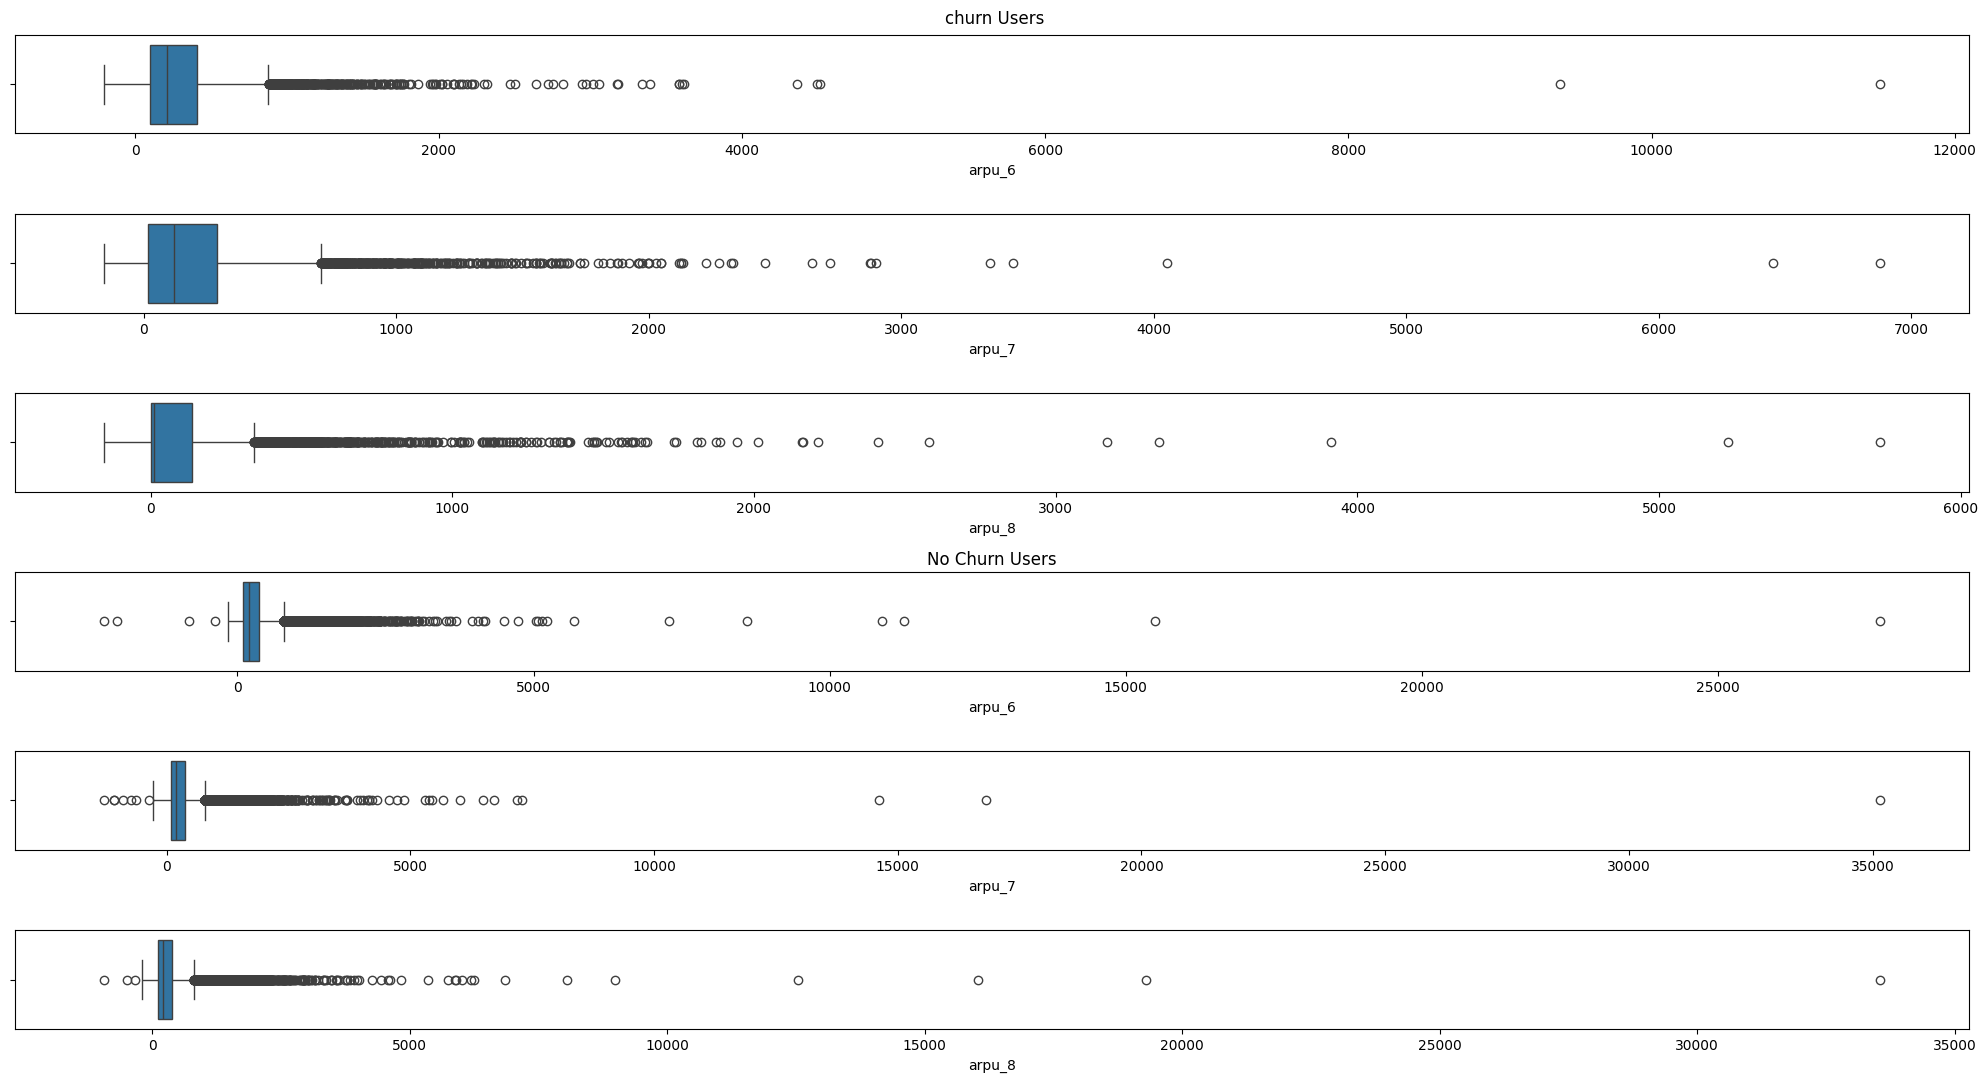

In [318]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.boxplot(churn_df, x='arpu_6', ax=ax[0])
sns.boxplot(churn_df, x='arpu_7', ax=ax[1])
sns.boxplot(churn_df, x='arpu_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.boxplot(no_churn_df, x='arpu_6', ax=ax[3])
sns.boxplot(no_churn_df, x='arpu_7', ax=ax[4])
sns.boxplot(no_churn_df, x='arpu_8', ax=ax[5])
plt.tight_layout()
plt.show()

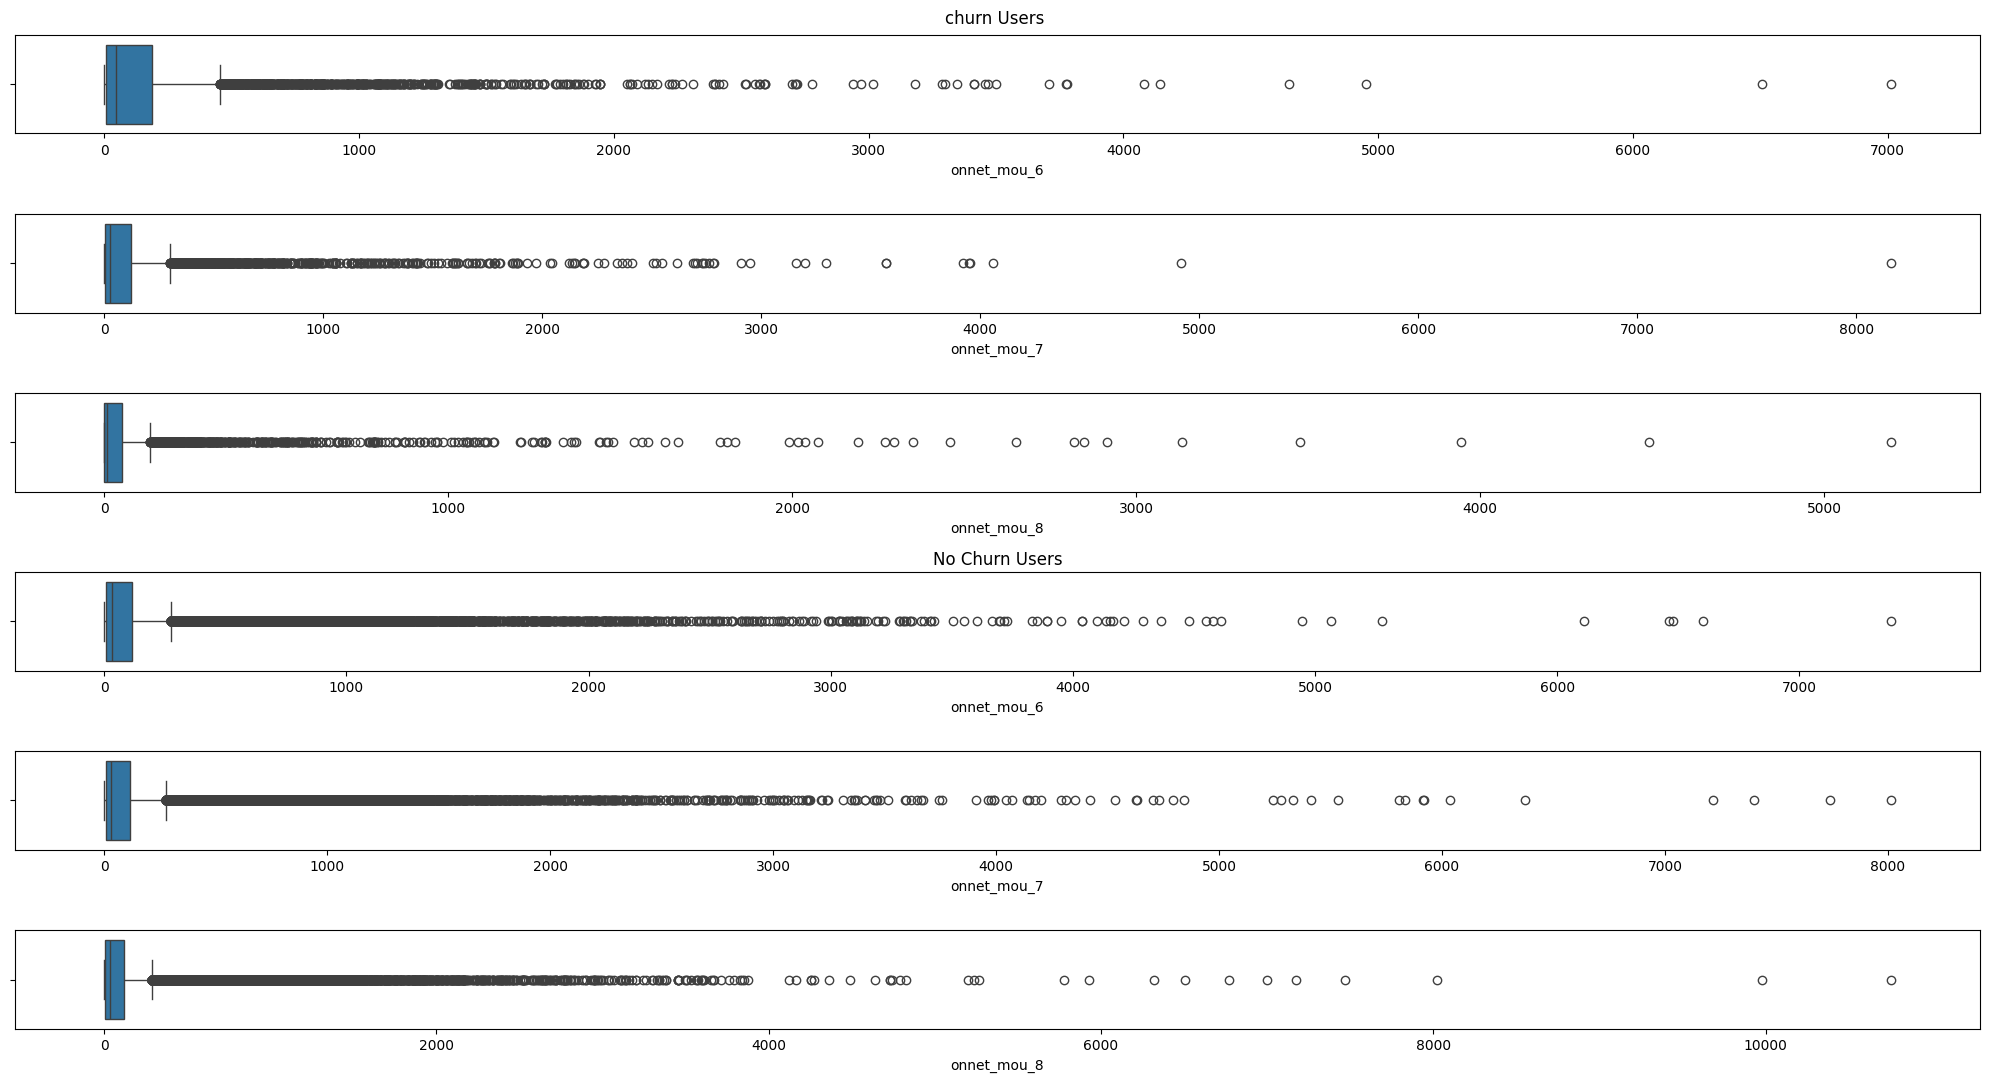

In [319]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.boxplot(churn_df, x='onnet_mou_6', ax=ax[0])
sns.boxplot(churn_df, x='onnet_mou_7', ax=ax[1])
sns.boxplot(churn_df, x='onnet_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.boxplot(no_churn_df, x='onnet_mou_6', ax=ax[3])
sns.boxplot(no_churn_df, x='onnet_mou_7', ax=ax[4])
sns.boxplot(no_churn_df, x='onnet_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

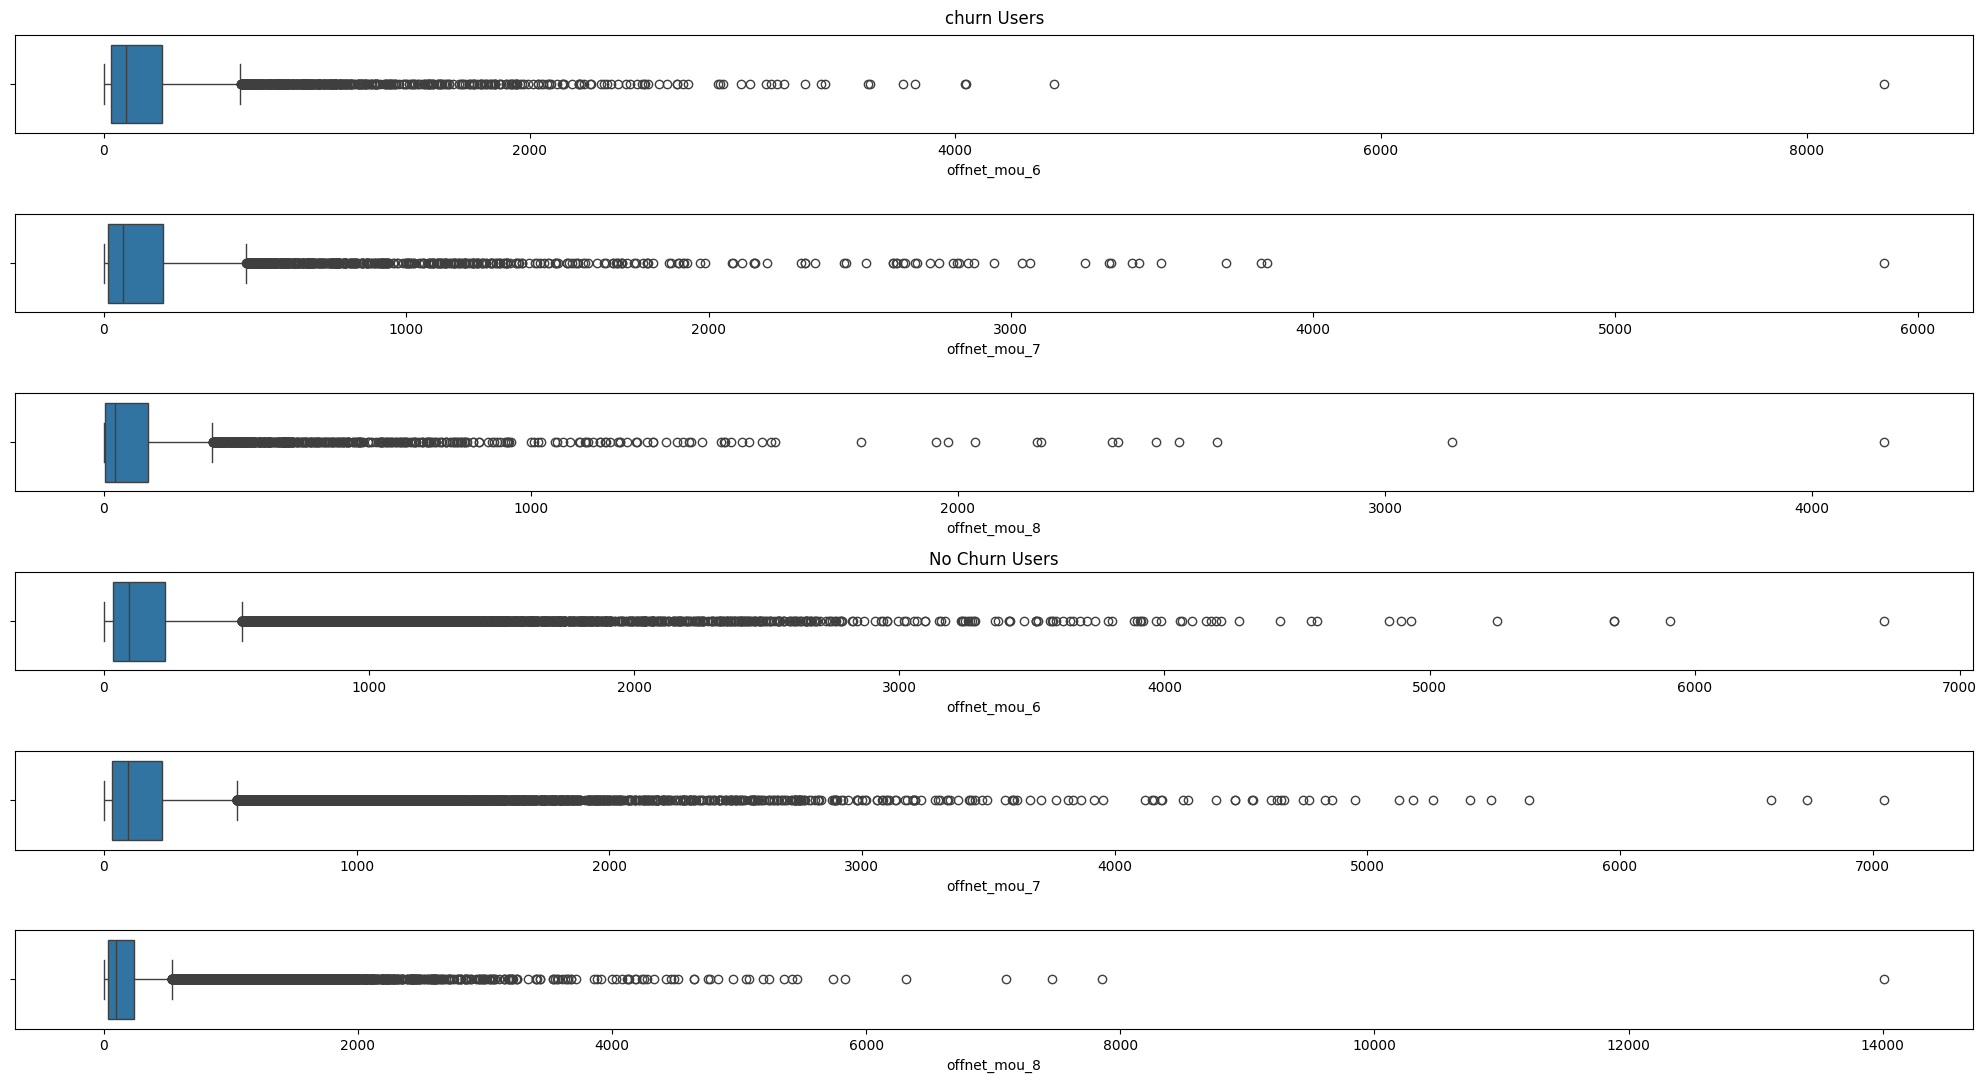

In [320]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.boxplot(churn_df, x='offnet_mou_6', ax=ax[0])
sns.boxplot(churn_df, x='offnet_mou_7', ax=ax[1])
sns.boxplot(churn_df, x='offnet_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.boxplot(no_churn_df, x='offnet_mou_6', ax=ax[3])
sns.boxplot(no_churn_df, x='offnet_mou_7', ax=ax[4])
sns.boxplot(no_churn_df, x='offnet_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

**In the above plot we can see the variation in the distribution on each month of churn user and no churn user.
we can see the churn user decreasing in the central tendency where as the no churn user are staying consistent.**

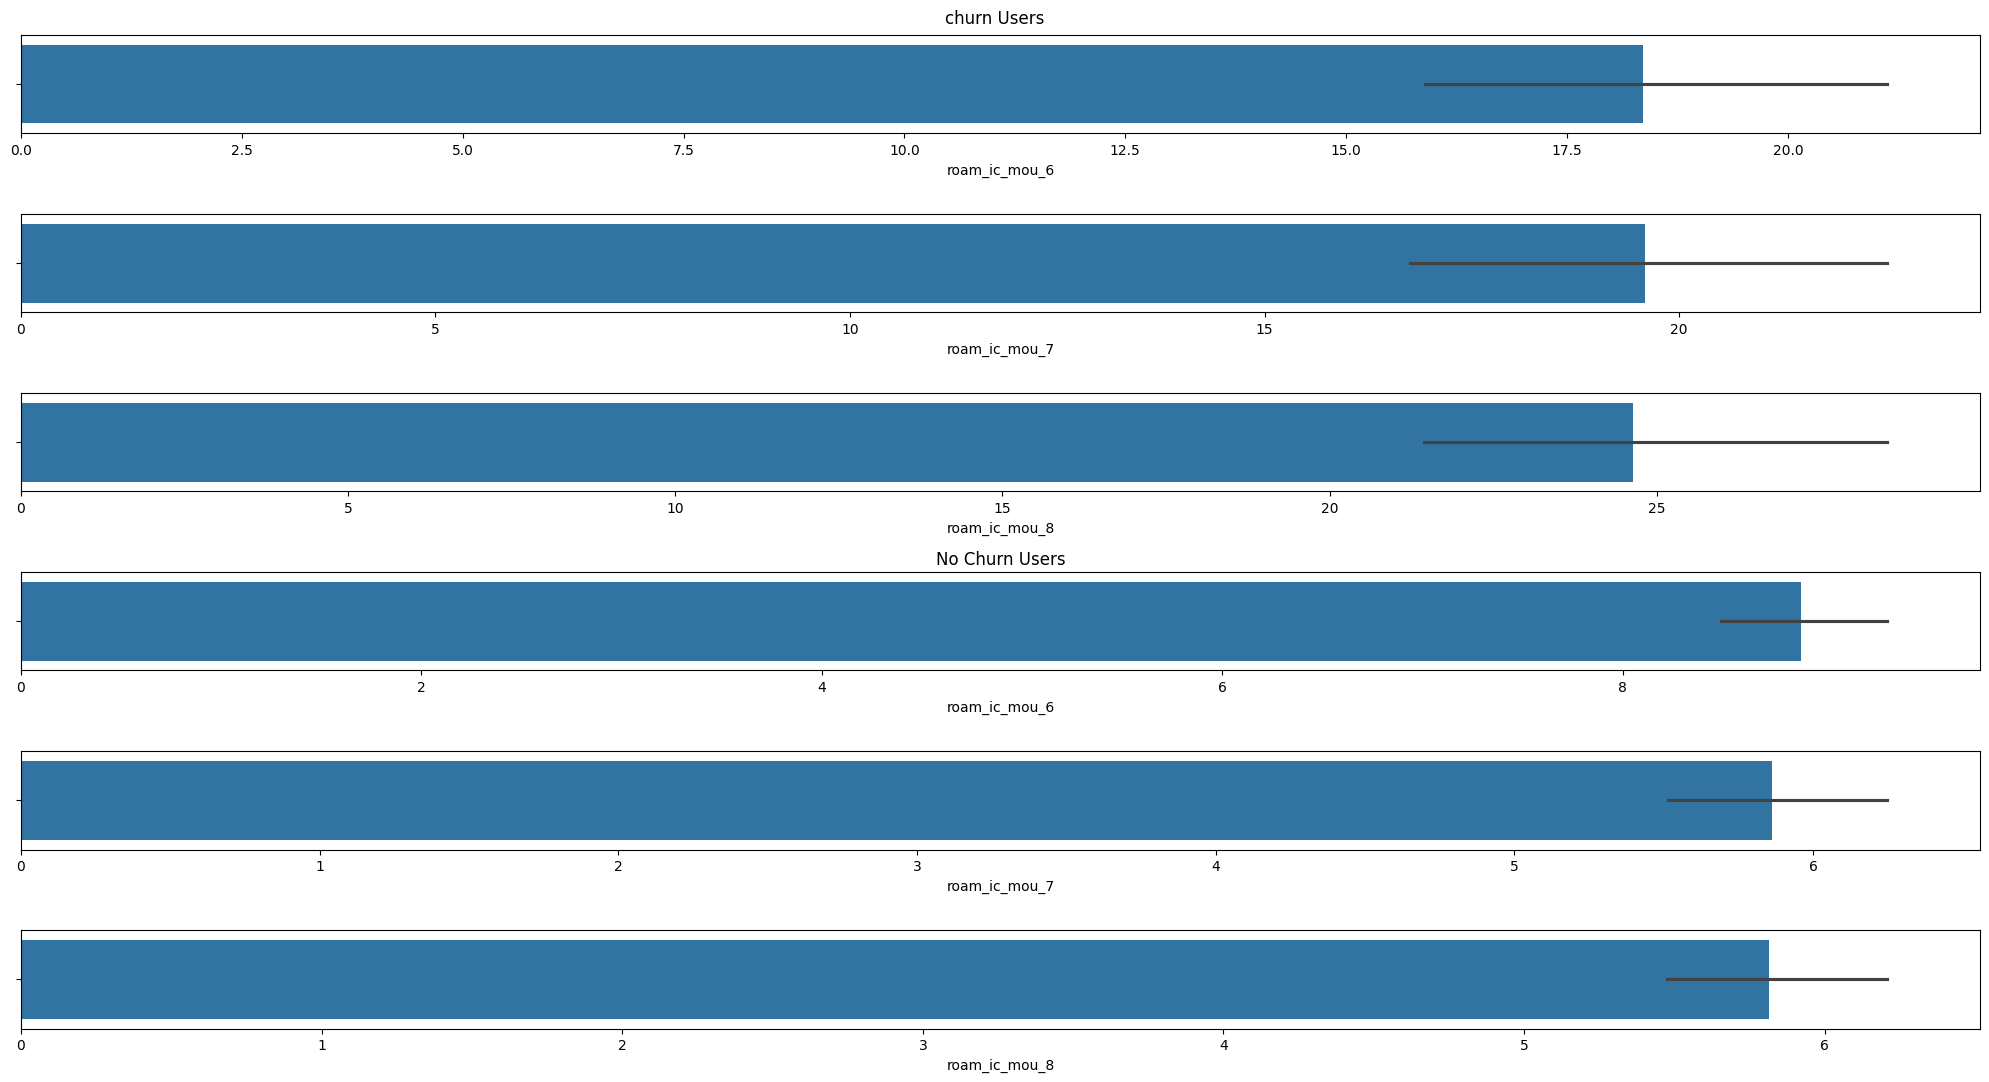

In [321]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.barplot(churn_df, x='roam_ic_mou_6', ax=ax[0])
sns.barplot(churn_df, x='roam_ic_mou_7', ax=ax[1])
sns.barplot(churn_df, x='roam_ic_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.barplot(no_churn_df, x='roam_ic_mou_6', ax=ax[3])
sns.barplot(no_churn_df, x='roam_ic_mou_7', ax=ax[4])
sns.barplot(no_churn_df, x='roam_ic_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

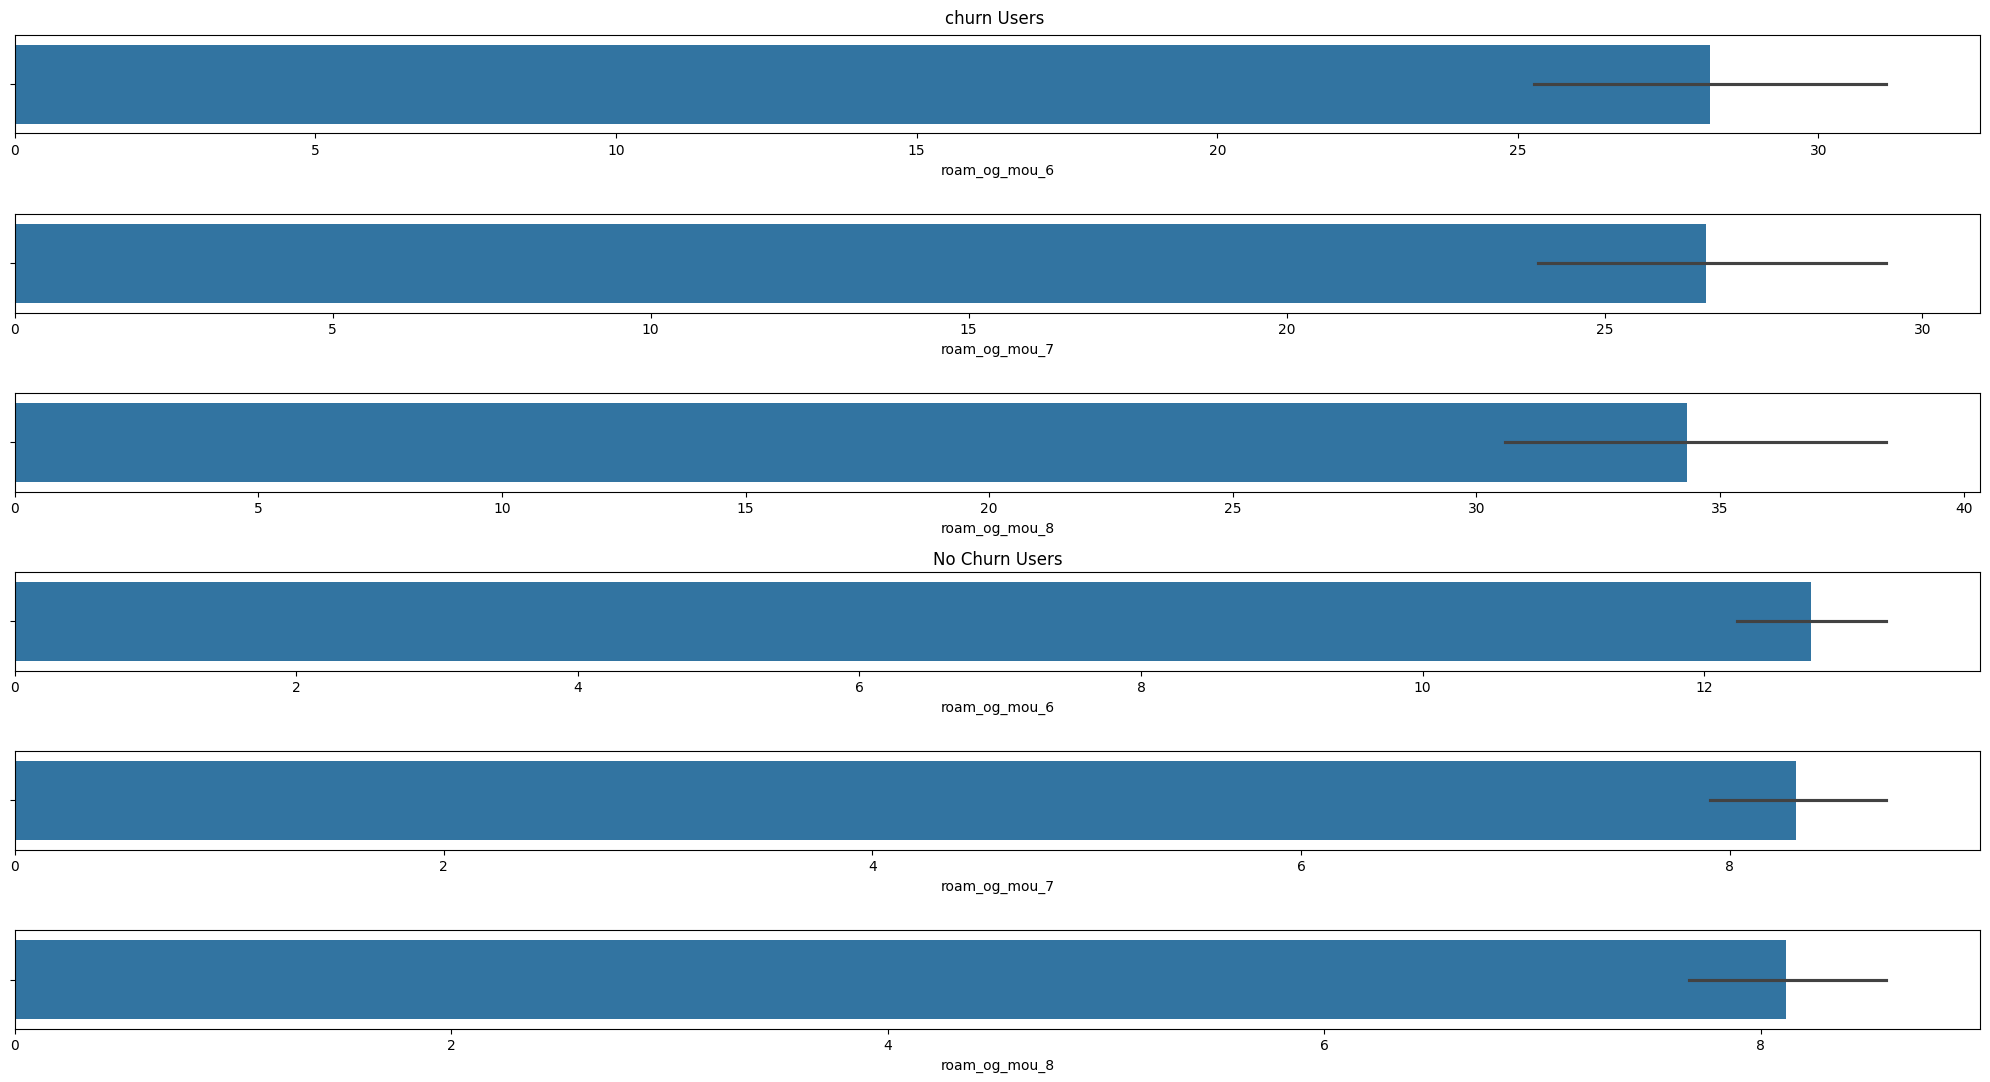

In [322]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.barplot(churn_df, x='roam_og_mou_6', ax=ax[0])
sns.barplot(churn_df, x='roam_og_mou_7', ax=ax[1])
sns.barplot(churn_df, x='roam_og_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.barplot(no_churn_df, x='roam_og_mou_6', ax=ax[3])
sns.barplot(no_churn_df, x='roam_og_mou_7', ax=ax[4])
sns.barplot(no_churn_df, x='roam_og_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

**From the above plot we can see that the churn users roaming usage is high when compared to the non churn users roming useage, This may be the reason why they leaving the network**

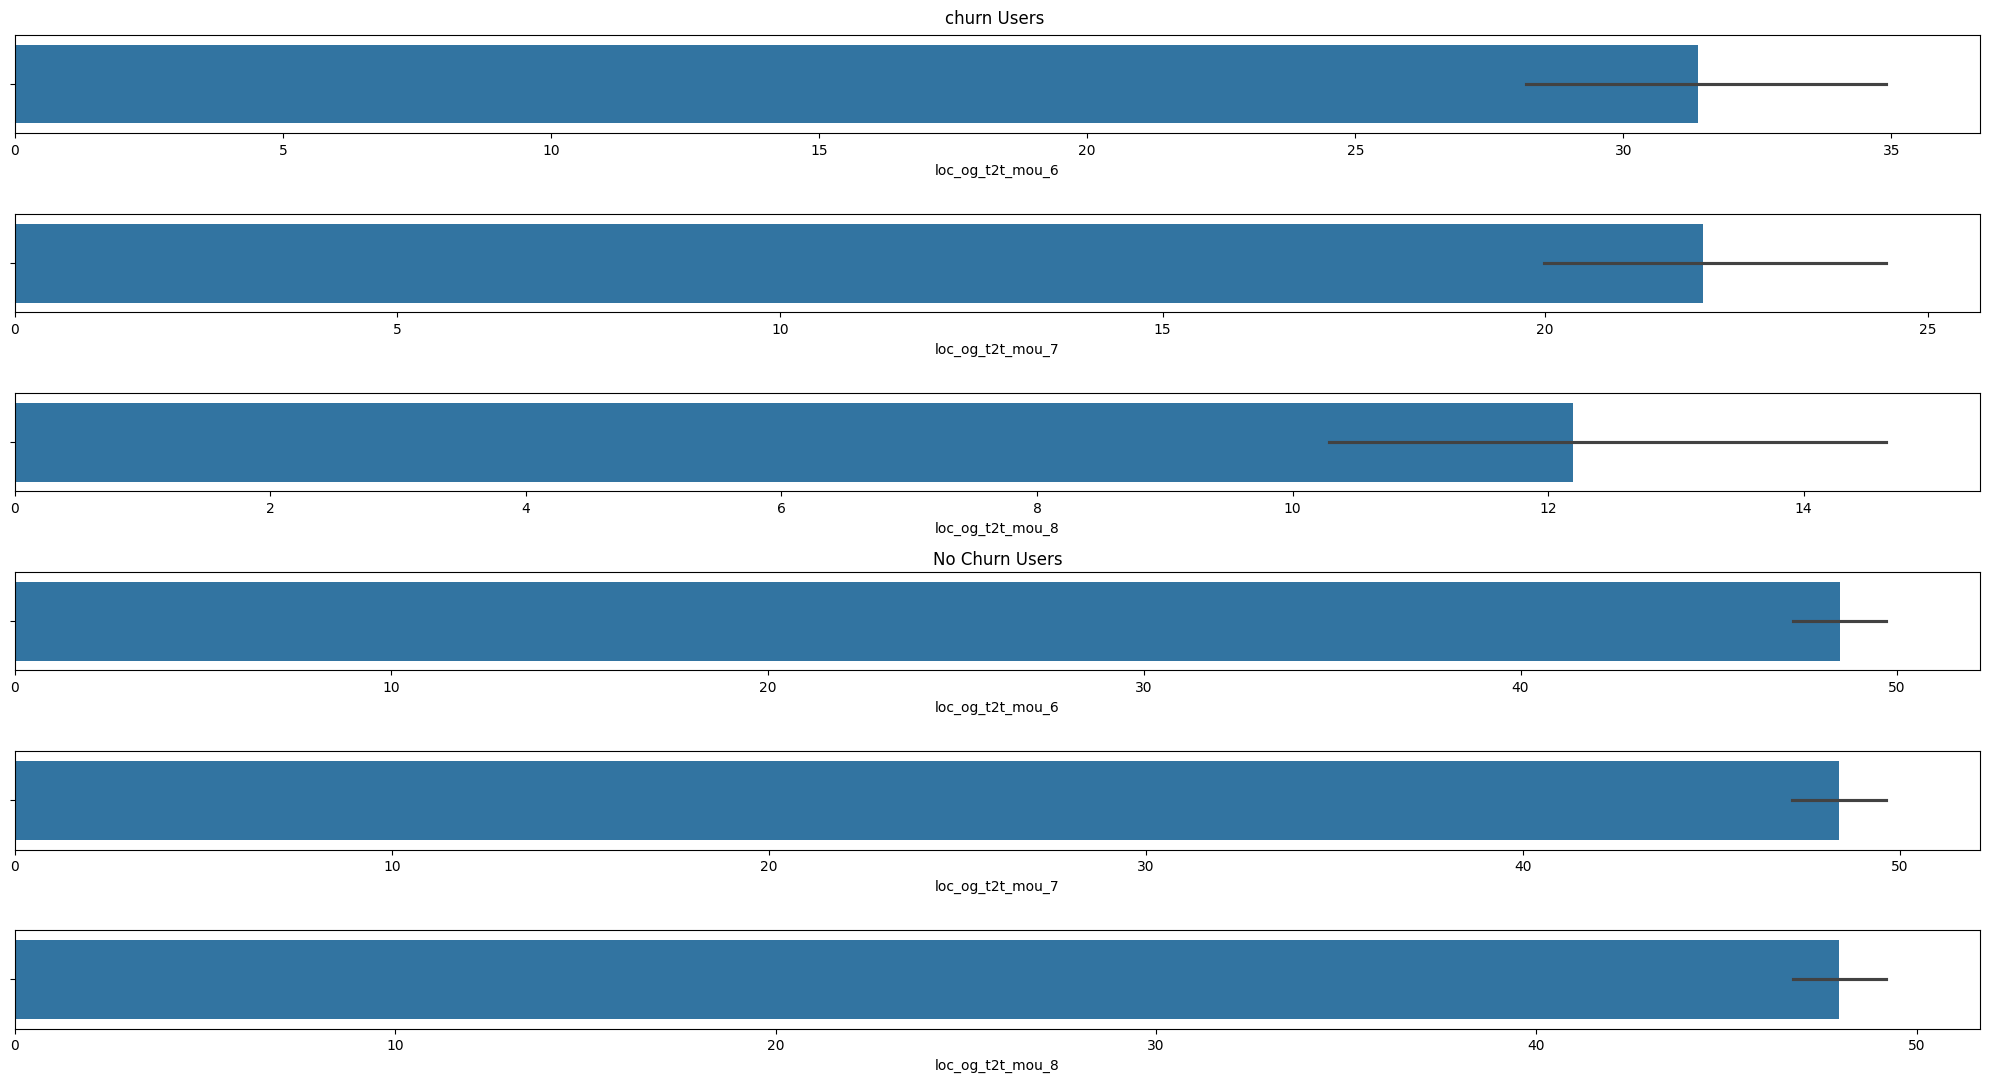

In [323]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.barplot(churn_df, x='loc_og_t2t_mou_6', ax=ax[0])
sns.barplot(churn_df, x='loc_og_t2t_mou_7', ax=ax[1])
sns.barplot(churn_df, x='loc_og_t2t_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.barplot(no_churn_df, x='loc_og_t2t_mou_6', ax=ax[3])
sns.barplot(no_churn_df, x='loc_og_t2t_mou_7', ax=ax[4])
sns.barplot(no_churn_df, x='loc_og_t2t_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

**In all features we can see lots of variability between the months in the churn users values.**

In [324]:
df2.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

## Churn Vs No Churn

In [31]:
churn_counts = df2['churn_probability'].value_counts()
churn_counts

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [32]:
perc = (churn_counts / churn_counts.sum()) * 100
perc

churn_probability
0    89.811283
1    10.188717
Name: count, dtype: float64

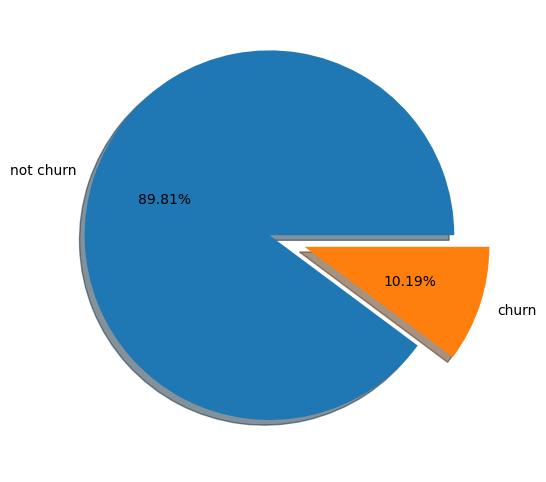

In [33]:
plt.figure(figsize=(10,6), dpi=100)
plt.pie(perc, labels=['not churn','churn'], autopct='%.2f%%', shadow=True, explode=[0.1, 0.1])
plt.show()

**From the above plot we can see we have a imbalanced dataset, We will handle this imbalance afterwards.**

In [34]:
df2_ = df2.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
df2_.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

In [35]:
corr_matrix = df2_.corr()[(df2_.corr() > 0.5) | (df2_.corr() < -0.5)]

In [36]:
corr_matrix

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.743730  0.643193          NaN          NaN   
arpu_7              0.743730  1.000000  0.782332          NaN          NaN   
arpu_8              0.643193  0.782332  1.000000          NaN          NaN   
onnet_mou_6              NaN       NaN       NaN     1.000000     0.748947   
onnet_mou_7              NaN       NaN       NaN     0.748947     1.000000   
onnet_mou_8              NaN       NaN       NaN     0.632096     0.794726   
offnet_mou_6        0.612922       NaN       NaN          NaN          NaN   
offnet_mou_7             NaN  0.596461       NaN          NaN          NaN   
offnet_mou_8             NaN       NaN  0.589579          NaN          NaN   
roam_ic_mou_6            NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_7            NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_8            NaN       NaN       NaN          NaN          NaN   
roam_og_mou_6            NaN       NaN       NaN          NaN          NaN   
roam_og_mou_7            NaN       NaN       NaN          NaN          NaN   
roam_og_mou_8            NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_6         NaN       NaN       NaN     0.501460          NaN   
loc_og_t2t_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_6         NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_7         NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_8         NaN       NaN       NaN          NaN          NaN   
loc_og_mou_6             NaN       NaN       NaN          NaN          NaN   
loc_og_mou_7             NaN       NaN       NaN          NaN          NaN   
loc_og_mou_8             NaN       NaN       NaN          NaN          NaN   
std_og_t2t_mou_6         NaN       NaN       NaN     0.855261     0.631161   
std_og_t2t_mou_7         NaN       NaN       NaN     0.627895     0.862173   
std_og_t2t_mou_8         NaN       NaN       NaN     0.517105     0.677879   
std_og_t2m_mou_6         NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_7         NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_8         NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_6         NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_7         NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_8         NaN       NaN       NaN          NaN          NaN   
std_og_mou_6             NaN       NaN       NaN     0.656146          NaN   
std_og_mou_7             NaN       NaN       NaN          NaN     0.661410   
std_og_mou_8             NaN       NaN       NaN          NaN     0.519041   
isd_og_mou_6             NaN       NaN       NaN          NaN          NaN   
isd_og_mou_7             NaN       NaN       NaN          NaN          NaN   
isd_og_mou_8             NaN       NaN       NaN          NaN          NaN   
spl_og_mou_6             NaN       NaN       NaN          NaN          NaN   
spl_og_mou_7             NaN       NaN       NaN          NaN          NaN   
spl_og_mou_8             NaN       NaN       NaN          NaN          NaN   
og_others_6              NaN       NaN       NaN          NaN          NaN   
og_others_7              NaN       NaN       NaN          NaN          NaN   
og_others_8              NaN       NaN      

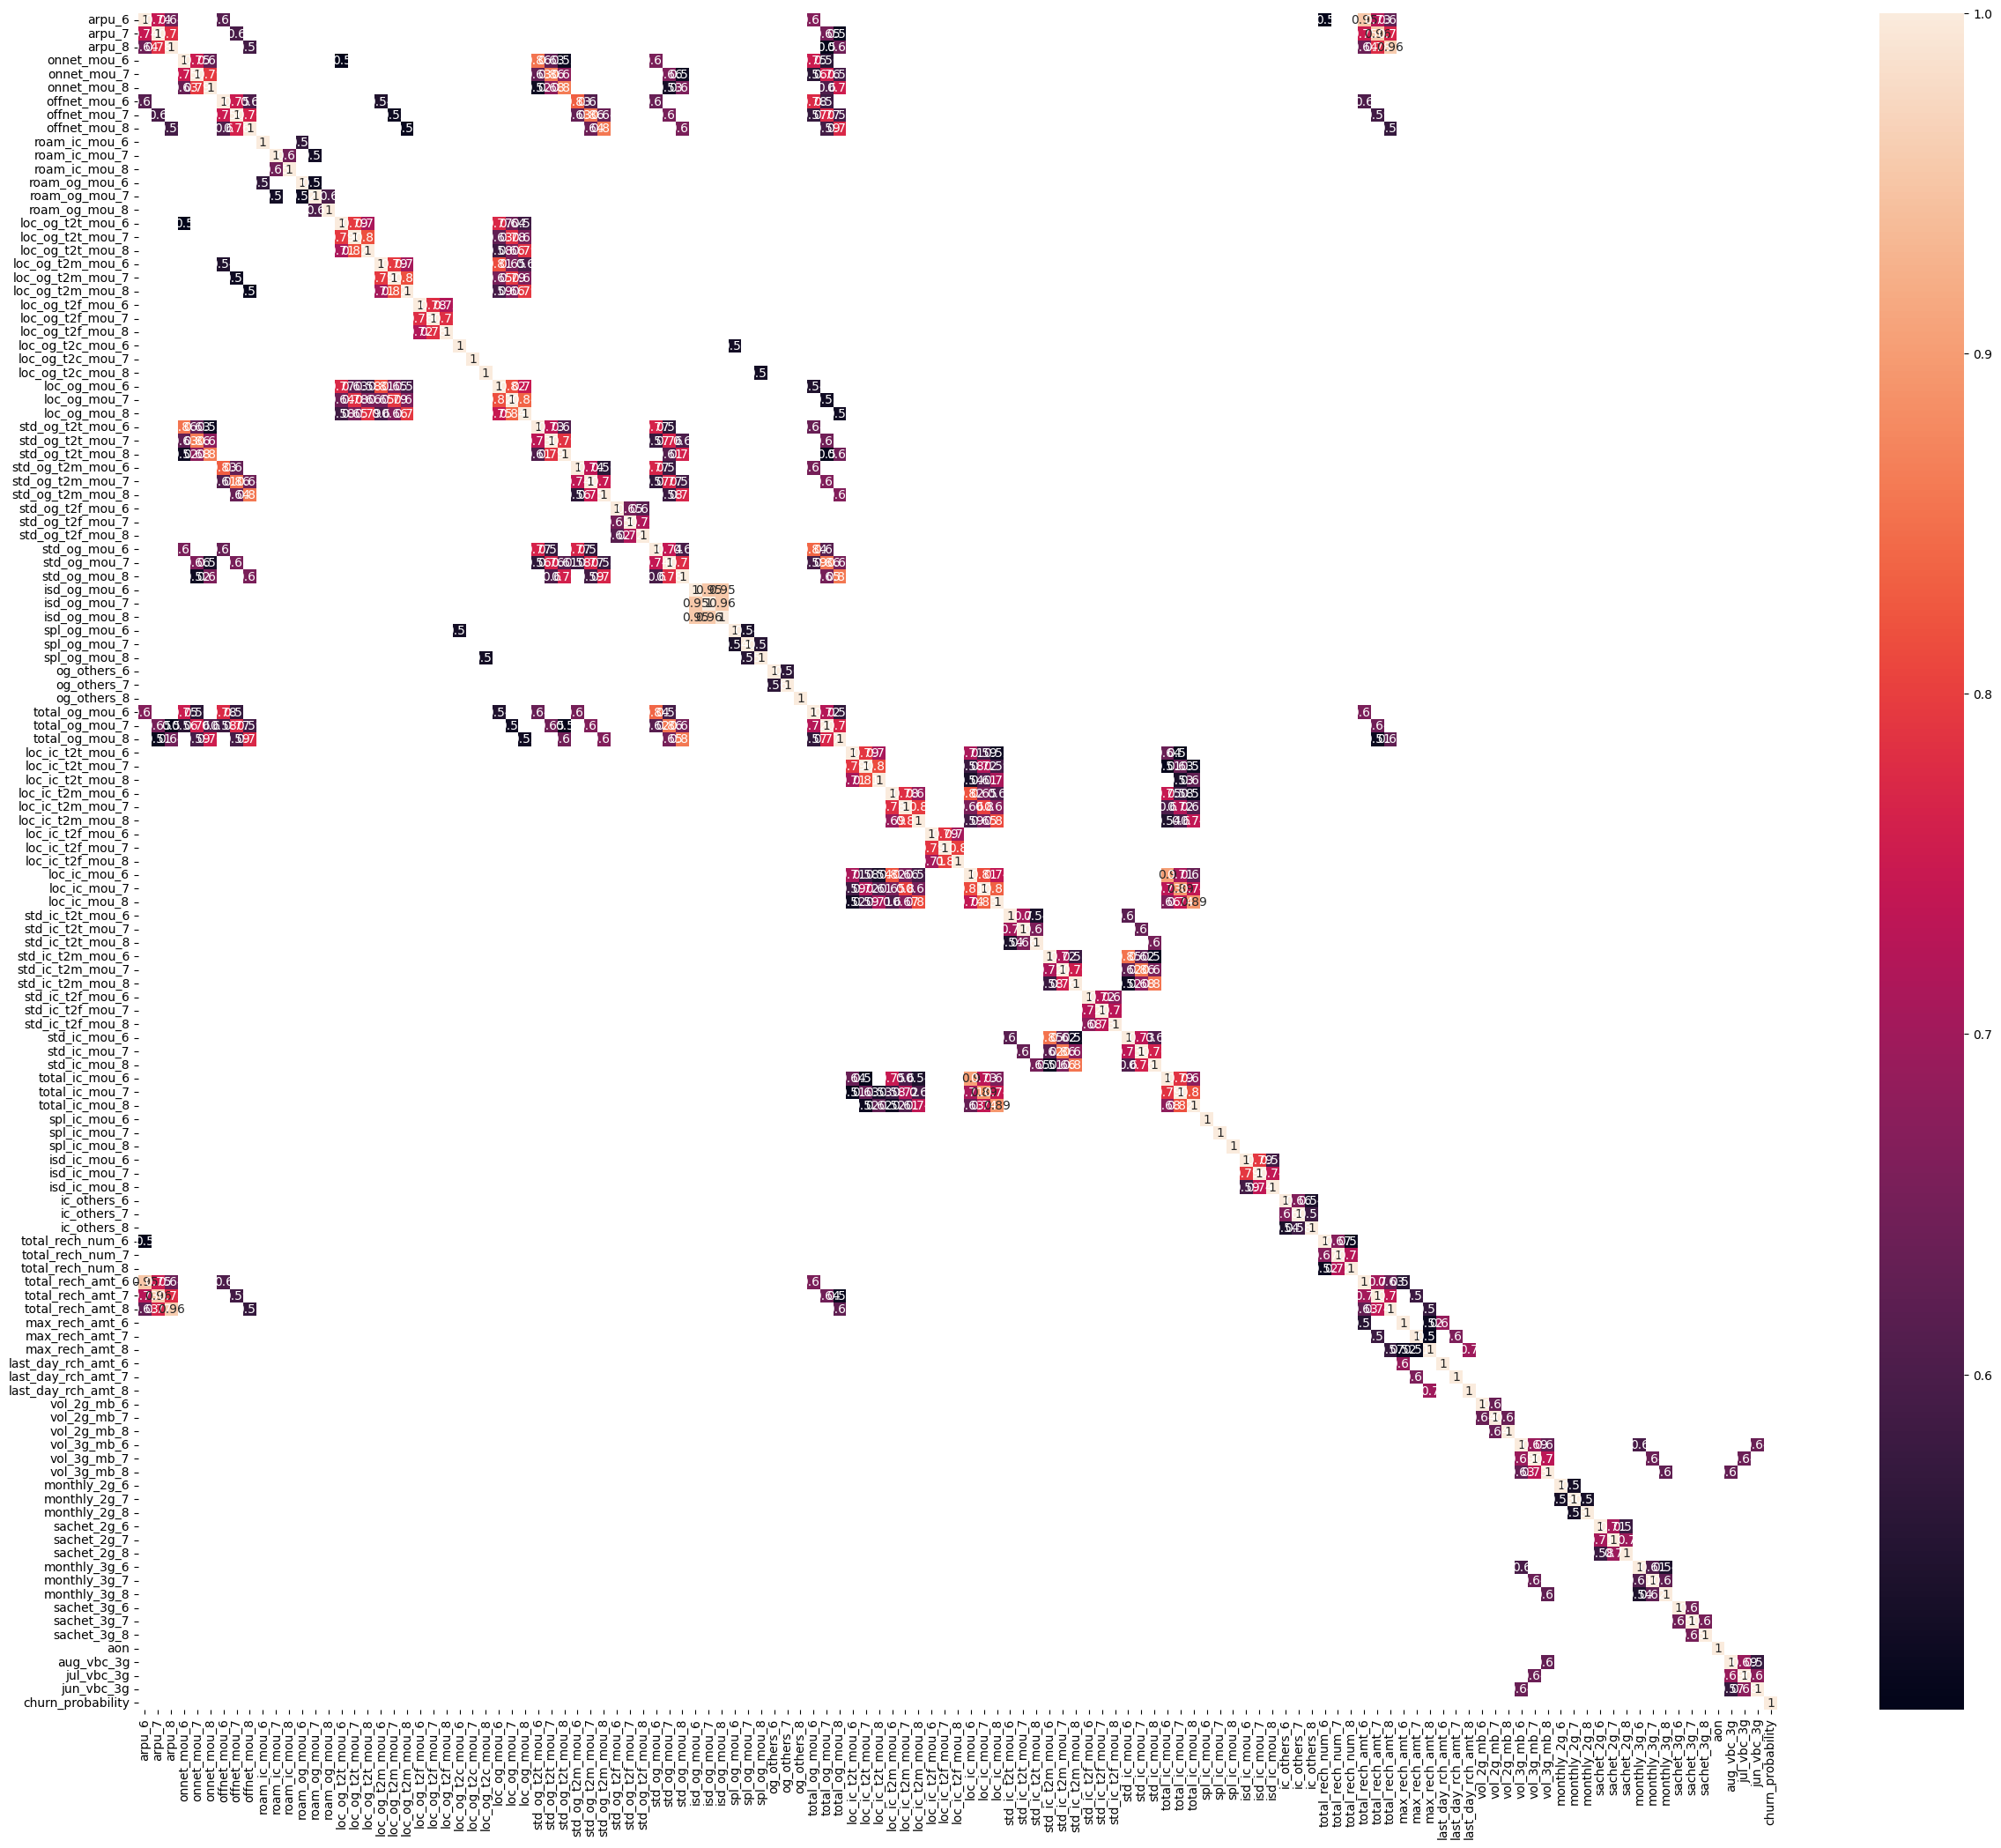

In [333]:
plt.figure(figsize=(30,25), dpi=100)
sns.heatmap(corr_matrix, annot=True)
plt.show()

From this we can see there are lot of multicollinearity in the data we should reduce that.

### Base Model

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, roc_auc_score, confusion_matrix

In [103]:
model_metrics = []

In [104]:
def append_to_metric_df(modelname, model, xtrain, xtest, ytrain, ytest):
    
    global model_metrics
    if 'KNN' in modelname:
        y_pred_train = model.predict(xtrain.values)
        y_pred_test = model.predict(xtest.values)
        y_pred_proba_train = model.predict_proba(xtrain.values)[:, 1]
        y_pred_proba_test = model.predict_proba(xtest.values)[:, 1]
    else:
        y_pred_train = model.predict(xtrain)
        y_pred_test = model.predict(xtest)
        y_pred_proba_train = model.predict_proba(xtrain)[:, 1]
        y_pred_proba_test = model.predict_proba(xtest)[:, 1]
    confusion_mat_train = confusion_matrix(ytrain, y_pred_train)
    confusion_mat_test = confusion_matrix(ytest, y_pred_test)
    sensitivity_train = confusion_mat_train[1][1]/ np.sum(confusion_mat_train[1])
    specivicity_train = confusion_mat_train[0][0] / np.sum(confusion_mat_train[0])
    sensitivity_test = confusion_mat_test[1][1]/ np.sum(confusion_mat_test[1])
    specivicity_test = confusion_mat_test[0][0] / np.sum(confusion_mat_test[0])
    f1_sc_train = f1_score(ytrain, y_pred_train)
    f1_sc_test = f1_score(ytest, y_pred_test)
    acu_train = accuracy_score(ytrain, y_pred_train)
    acu_test = accuracy_score(ytest, y_pred_test)
    prec_train = precision_score(ytrain, y_pred_train)
    prec_test = precision_score(ytest, y_pred_test)
    auc_score_train = roc_auc_score(ytrain, y_pred_proba_train)
    auc_score_test = roc_auc_score(ytest, y_pred_proba_test)
    model_metrics.append({'Model':modelname, 
                                          'Sensitivity_train':sensitivity_train, 
                                          'Specificity_train':specivicity_test, 
                                          'Accuracy_train':acu_train, 
                                          'F1-Score_train':f1_sc_train,
                                          'Precission_train':prec_train,
                                          'ROC_AUC_Score_train':auc_score_train,
                                          'Sensitivity_test':sensitivity_test, 
                                          'Specificity_test':specivicity_test, 
                                          'Accuracy_test':acu_test, 
                                          'F1-Score_test':f1_sc_test,
                                          'Precission_test':prec_test,
                                          'ROC_AUC_Score_test':auc_score_test
                                         })
    print("train data report: ")
    print(classification_report(ytrain, y_pred_train))
    print("test data report: ")
    print(classification_report(ytest, y_pred_test))

In [105]:
x = df2.drop(['churn_probability', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
y = df2['churn_probability']

In [106]:
xtrain_b, xtest_b, ytrain_b, ytest_b =  train_test_split(x, y, train_size=0.7, random_state=10, stratify=y)

### Filling Null values

In [107]:
xtrain_b.isna().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6           1928
onnet_mou_7           1884
onnet_mou_8           2597
offnet_mou_6          1928
offnet_mou_7          1884
offnet_mou_8          2597
roam_ic_mou_6         1928
roam_ic_mou_7         1884
roam_ic_mou_8         2597
roam_og_mou_6         1928
roam_og_mou_7         1884
roam_og_mou_8         2597
loc_og_t2t_mou_6      1928
loc_og_t2t_mou_7      1884
loc_og_t2t_mou_8      2597
loc_og_t2m_mou_6      1928
loc_og_t2m_mou_7      1884
loc_og_t2m_mou_8      2597
loc_og_t2f_mou_6      1928
loc_og_t2f_mou_7      1884
loc_og_t2f_mou_8      2597
loc_og_t2c_mou_6      1928
loc_og_t2c_mou_7      1884
loc_og_t2c_mou_8      2597
loc_og_mou_6          1928
loc_og_mou_7          1884
loc_og_mou_8          2597
std_og_t2t_mou_6      1928
std_og_t2t_mou_7      1884
std_og_t2t_mou_8      2597
std_og_t2m_mou_6      1928
std_og_t2m_mou_7      1884
std_og_t2m_mou_8      2597
std_og_t2f_mou_6      1928
s

In [108]:
xtest_b.isna().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6            840
onnet_mou_7            803
onnet_mou_8           1106
offnet_mou_6           840
offnet_mou_7           803
offnet_mou_8          1106
roam_ic_mou_6          840
roam_ic_mou_7          803
roam_ic_mou_8         1106
roam_og_mou_6          840
roam_og_mou_7          803
roam_og_mou_8         1106
loc_og_t2t_mou_6       840
loc_og_t2t_mou_7       803
loc_og_t2t_mou_8      1106
loc_og_t2m_mou_6       840
loc_og_t2m_mou_7       803
loc_og_t2m_mou_8      1106
loc_og_t2f_mou_6       840
loc_og_t2f_mou_7       803
loc_og_t2f_mou_8      1106
loc_og_t2c_mou_6       840
loc_og_t2c_mou_7       803
loc_og_t2c_mou_8      1106
loc_og_mou_6           840
loc_og_mou_7           803
loc_og_mou_8          1106
std_og_t2t_mou_6       840
std_og_t2t_mou_7       803
std_og_t2t_mou_8      1106
std_og_t2m_mou_6       840
std_og_t2m_mou_7       803
std_og_t2m_mou_8      1106
std_og_t2f_mou_6       840
s

In [109]:
for col in xtrain_b.columns:
    xtrain_b[col].fillna(xtrain_b[col].median(), inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1440057534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtrain_b[col].fillna(xtrain_b[col].median(), inplace=True)
C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1440057534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [110]:
for col in xtest_b.columns:
    xtest_b[col].fillna(xtest_b[col].median(), inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1665399483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtest_b[col].fillna(xtest_b[col].median(), inplace=True)
C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1665399483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [111]:
xtrain_b.isna().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [112]:
xtest_b.isna().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

filling null values of train data with train median and test data with test median to avoid data leakage.

**1. Base model Logistic regression**

In [113]:
base_model_lr = LogisticRegression(max_iter=1000)
base_model_lr.fit(xtrain_b, ytrain_b)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [115]:
append_to_metric_df("Base Model LogisticRegression", base_model_lr, xtrain_b, xtest_b, ytrain_b, ytest_b)

train data report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     44007
           1       0.77      0.45      0.57      4992

    accuracy                           0.93     48999
   macro avg       0.86      0.72      0.76     48999
weighted avg       0.92      0.93      0.92     48999

test data report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18860
           1       0.78      0.45      0.57      2140

    accuracy                           0.93     21000
   macro avg       0.86      0.72      0.77     21000
weighted avg       0.92      0.93      0.92     21000



**2. Base model Decission Tree**

In [116]:
base_model_dt = DecisionTreeClassifier()
base_model_dt.fit(xtrain_b, ytrain_b)

DecisionTreeClassifier()

In [117]:
append_to_metric_df("Base_model_DecisionTreeClassifier", base_model_dt, xtrain_b, xtest_b, ytrain_b, ytest_b)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18860
           1       0.55      0.57      0.56      2140

    accuracy                           0.91     21000
   macro avg       0.75      0.76      0.75     21000
weighted avg       0.91      0.91      0.91     21000



**3. Base Model Randome Forest**

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
base_model_rf = RandomForestClassifier()
base_model_rf.fit(xtrain_b, ytrain_b)

RandomForestClassifier()

In [120]:
append_to_metric_df("Base_model_RandomForestClassifier", base_model_rf, xtrain_b, xtest_b, ytrain_b, ytest_b)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18860
           1       0.79      0.57      0.67      2140

    accuracy                           0.94     21000
   macro avg       0.87      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000



**4. Base Model KNN**

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
base_model_KNN = KNeighborsClassifier()
base_model_KNN.fit(xtrain_b, ytrain_b)

KNeighborsClassifier()

In [123]:
append_to_metric_df("Base_model_KNN", base_model_KNN, xtrain_b, xtest_b, ytrain_b, ytest_b)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


train data report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     44007
           1       0.78      0.49      0.60      4992

    accuracy                           0.93     48999
   macro avg       0.86      0.74      0.78     48999
weighted avg       0.93      0.93      0.93     48999

test data report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18860
           1       0.63      0.38      0.47      2140

    accuracy                           0.91     21000
   macro avg       0.78      0.68      0.71     21000
weighted avg       0.90      0.91      0.90     21000



In [124]:
pd.DataFrame(model_metrics)

Model  Sensitivity_train  Specificity_train  \
0      Base Model LogisticRegression           0.447917           0.985207   
1      Base Model LogisticRegression           0.447917           0.985207   
2  Base_model_DecisionTreeClassifier           1.000000           0.946501   
3  Base_model_RandomForestClassifier           0.999800           0.982927   
4                     Base_model_KNN           0.490785           0.974814   

   Accuracy_train  F1-Score_train  Precission_train  ROC_AUC_Score_train  \
0        0.930305        0.567009          0.772366             0.898948   
1        0.930305        0.567009          0.772366             0.898948   
2        1.000000        1.000000          1.000000             1.000000   
3        0.999980        0.999900          1.000000             1.000000   
4        0.934305        0.603523          0.783499             0.961233   

   Sensitivity_test  Specificity_test  Accuracy_test  F1-Score_test  \
0          0.451402          0.985207       0.930810       0.570753   
1          0.451402          0.985207       0.930810       0.570753   
2          0.571028          0.946501       0.908238       0.559140   
3          0.574766          0.982927       0.941333       0.666306   
4          0.376636          0.974814       0.913857       0.471207   

   Precission_test  ROC_AUC_Score_test  
0         0.775904            0.901623  
1         0.775904            0.901623  
2         0.547736            0.758764  
3         0.792526            0.935102  
4         0.629196            0.825458

# Feature Engineering

**As we say there is reduction in values for all features in churn users and there is not much of a difference in non churn users, we are going to feature engineer the variables according to that so that we can differentiate churn usere from non churn users.**

In [37]:
df3 = pd.DataFrame()

**df3['arpu_diff'] = ((df2['arpu_6'] - df2['arpu_7']) + (df2['arpu_7'] - df2['arpu_8']))**

**Using the above formula we going to find the difference between the values between each month and add them together and make them into one feature.
So the value with more difference has more probability to be a churn user and value with the less difference has less probability to be churn.**

**Note : If a user increasing the usage every month he may likes the network (less probability to churn) in that case we will get negative values for non-churn user.**

In [38]:
# code to get difference between 3 columns.
new_columns = []
for col in df2.columns:
    if col == 'churn_probability':
        break
    if (('6' in col)) and col not in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn_probability']:
        idx = df2.columns.get_loc(col)
        new_col_name = col.split('6')[0] + "diff"
        new_columns.append(new_col_name)
        df3[new_col_name] = (df2.iloc[:,idx] - df2.iloc[:,idx+1]) + (df2.iloc[:,idx+1] - df2.iloc[:,idx+2])
#         df3[new_col_name] = (df2.iloc[:,idx] + df2.iloc[:,idx+1] +  df2.iloc[:,idx+2])

In [39]:
df3[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']] = df2[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]

In [40]:
df3['aon'] = df2['aon']

In [41]:
df3['churn_probability'] = df2['churn_probability']

### New Dataframe with difference

In [42]:
df3.head()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
0     23.750           47.29            29.91              0.00   
1    -42.953            0.00           -30.89              0.00   
2     60.806            0.53            53.99              0.00   
3     45.267            7.26            18.53              0.00   
4    139.143           15.15            47.36             53.64   

   roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
0              0.00                 1.95                 2.96   
1              0.00                 0.00                 0.00   
2              0.00                 0.53                24.11   
3             -1.63                 6.99                14.28   
4             15.73                 4.03                32.13   

   loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
0                 0.00                 0.00             4.92   
1                 0.00               -29.79             0.00   
2                 0.00                 2.14            24.64   
3                 0.00                -8.03            21.28   
4                 6.98                 0.00            43.15   

   std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_t2f_mou_diff  \
0                45.33                18.75                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                28.94                 0.00   
3                 0.26                10.73                 0.56   
4                 0.00                 4.35                 0.00   

   std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  og_others_diff  \
0            64.08              0.0             8.20            0.38   
1             0.00              0.0           -31.66            0.00   
2            28.94              0.0             2.89            0.00   
3            11.56              0.0           -10.66            0.00   
4             4.35              0.0             0.00            0.00   

   total_og_mou_diff  loc_ic_t2t_mou_diff  loc_ic_t2m_mou_diff  \
0              77.58                -5.36               -16.08   
1             -31.66                -8.85                -9.68   
2              56.49                -1.98                66.35   
3              22.19                 1.10                -3.15   
4              47.50                 2.78                -8.91   

   loc_ic_t2f_mou_diff  loc_ic_mou_diff  std_ic_t2t_mou_diff  \
0                 0.00           -21.45                -0.21   
1                -3.05           -21.59                 0.00   
2                 0.00            64.37                11.69   
3                 7.23             5.18                 0.00   
4                -0.63            -6.77                 0.00   

   std_ic_t2m_mou_diff  std_ic_t2f_mou_diff  std_ic_mou_diff  \
0                -7.50                  0.0            -7.72   
1                 0.00                  0.0             0.00   
2                11.83                  0.0            23.53   
3                 6.08                  0.0             6.08   
4                 0.00                  0.0             0.00   

   total_ic_mou_diff  spl_ic_mou_diff  isd_ic_mou_diff  ic_others_diff  \
0             -28.72            -0.66              0.0            1.11   
1             -21.60            -0.01              0.0            0.00   
2              87.65             0.00              0.0           -0.25   
3              11.27             0.00              0.0            0.00   
4              -6.77             0.00              0.0            0.00   

   total_rech_num_diff  total_rech_amt_diff  max_rech_amt_diff  \
0                    1                   67                 55   
1                   -2                  -50                -50   
2                    0                   70                 70   
3                   -1                   30                 60   
4                    5                  

In [43]:
df3.describe()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
count  69999.000000    63842.000000     63842.000000      63842.000000   
mean       4.275538       -0.168723         2.331638          2.600106   
std      290.254208      261.353163       283.520548         61.927238   
min   -13608.664000    -6790.380000    -13775.050000      -2313.440000   
25%      -95.512500      -21.217500       -46.777500          0.000000   
50%        1.464000        0.000000         1.040000          0.000000   
75%      103.611500       24.630000        54.720000          0.000000   
max    11505.508000     6823.200000      8332.000000       2589.090000   

       roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
count      63842.000000         63842.000000         63842.000000   
mean           4.196043             1.141333             1.813730   
std           76.935092           117.042421           122.113883   
min        -3589.300000         -6602.700000         -2948.710000   
25%            0.000000            -9.030000           -23.670000   
50%            0.000000             0.000000             0.000000   
75%            0.000000             9.850000            24.930000   
max         3161.790000          3775.080000          4395.770000   

       loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
count         63842.000000         63842.000000     63842.000000   
mean              0.098162            -0.267021         3.053281   
std               9.963207             7.351420       179.080452   
min            -532.010000          -351.830000     -6717.900000   
25%              -0.250000             0.000000       -33.500000   
50%               0.000000             0.000000         0.000000   
75%               0.350000             0.000000        36.567500   
max             324.070000           336.130000      4417.620000   

       std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_t2f_mou_diff  \
count         63842.000000         63842.000000         63842.000000   
mean             -2.993936            -2.041319             0.072816   
std             229.464013           244.077069             6.978032   
min           -6499.960000        -13950.040000          -309.910000   
25%              -1.110000            -6.520000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               1.310000             7.420000             0.000000   
max            6987.640000          8314.760000           628.560000   

       std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  og_others_diff  \
count     63842.000000     63842.000000     63842.000000    63842.000000   
mean         -4.962318        -0.029094        -1.081895        0.415524   
std         357.435867         8.948558        18.015486        5.090802   
min      -13980.060000      -537.160000      -893.670000     -347.990000   
25%         -12.930000         0.000000        -1.550000        0.000000   
50%           0.000000         0.000000         0.000000        0.000000   
75%          14.587500         0.000000         0.160000        0.000000   
max        8432.990000       637.420000       960.620000      800.890000   

       total_og_mou_diff  loc_ic_t2t_mou_diff  loc_ic_t2m_mou_diff  \
count       69999.000000         63842.000000         63842.000000   
mean            1.938371             0.540479            -1.641932   
std           439.648257           105.649617           131.748624   
min        -14043.060000         -3720.880000         -5971.610000   
25%           -76.290000           -10.880000           -30.400000   
50%             0.000000             0.000000            -0.420000   
75%            84.855000            11.330000            27.670000   
max          8488.360000          4662.410000          3266.280000   

       loc_ic_t2f_mou_diff  loc_ic_mou_diff  std_ic_t2t_mou_diff  \
count         63842.000000     63842.000000         63842.000000   
mean   

**converting last_date_recharge to date_of_last_rech_diff**

In [44]:
df3['date_of_last_rech_6'] = pd.to_datetime(df3['date_of_last_rech_6'])
df3['date_of_last_rech_7'] = pd.to_datetime(df3['date_of_last_rech_7'])
df3['date_of_last_rech_8'] = pd.to_datetime(df3['date_of_last_rech_8'])

In [45]:
df3['date_of_last_rech_diff'] = ((df3['date_of_last_rech_7'] - df3['date_of_last_rech_6']) + (df3['date_of_last_rech_8'] - df3['date_of_last_rech_7'])).dt.days

In [46]:
df3['date_of_last_rech_diff'].fillna(df3['date_of_last_rech_diff'].median(), inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\3557850626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['date_of_last_rech_diff'].fillna(df3['date_of_last_rech_diff'].median(), inplace=True)


In [47]:
df3.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [48]:
df3.shape

(69999, 43)

## Checking Null Values

In [49]:
df3.isna().sum()

arpu_diff                    0
onnet_mou_diff            6157
offnet_mou_diff           6157
roam_ic_mou_diff          6157
roam_og_mou_diff          6157
loc_og_t2t_mou_diff       6157
loc_og_t2m_mou_diff       6157
loc_og_t2f_mou_diff       6157
loc_og_t2c_mou_diff       6157
loc_og_mou_diff           6157
std_og_t2t_mou_diff       6157
std_og_t2m_mou_diff       6157
std_og_t2f_mou_diff       6157
std_og_mou_diff           6157
isd_og_mou_diff           6157
spl_og_mou_diff           6157
og_others_diff            6157
total_og_mou_diff            0
loc_ic_t2t_mou_diff       6157
loc_ic_t2m_mou_diff       6157
loc_ic_t2f_mou_diff       6157
loc_ic_mou_diff           6157
std_ic_t2t_mou_diff       6157
std_ic_t2m_mou_diff       6157
std_ic_t2f_mou_diff       6157
std_ic_mou_diff           6157
total_ic_mou_diff            0
spl_ic_mou_diff           6157
isd_ic_mou_diff           6157
ic_others_diff            6157
total_rech_num_diff          0
total_rech_amt_diff          0
max_rech

In [50]:
churn_user = df3[df3['churn_probability'] == 1]
no_churn_user = df3[df3['churn_probability'] == 0]

In [51]:
churn_user.describe()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
count   7132.000000     3795.000000      3795.000000       3795.000000   
mean     194.062687      119.994393       136.162867         -5.059494   
std      409.766705      393.535680       401.072055        115.984320   
min    -5731.327000    -3944.860000     -4167.740000      -2313.440000   
25%        8.852500       -0.430000        -2.930000         -5.365000   
50%      145.971500       20.050000        45.160000          0.000000   
75%      316.062500      128.245000       175.665000          0.000000   
max    11505.508000     6823.200000      8332.000000       1709.630000   

       roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
count       3795.000000          3795.000000          3795.000000   
mean          -3.236221            17.394588            29.383655   
std          142.551608           131.349231           100.122040   
min        -3589.300000         -3412.700000         -1098.370000   
25%          -12.745000             0.000000             0.000000   
50%            0.000000             1.830000             7.890000   
75%            0.090000            15.015000            39.915000   
max         3161.790000          3775.080000          1918.550000   

       loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
count          3795.000000          3795.000000      3795.000000   
mean              0.566372             0.284495        47.346917   
std               6.233608             8.197092       180.166939   
min            -141.690000          -114.550000     -3815.680000   
25%               0.000000             0.000000         0.000000   
50%               0.000000             0.000000        12.570000   
75%               0.000000             0.000000        60.495000   
max             137.570000           336.130000      3863.310000   

       std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_t2f_mou_diff  \
count          3795.000000          3795.000000          3795.000000   
mean            104.677581           104.485958             0.287323   
std             356.093036           367.050246             4.997755   
min           -3485.060000         -4008.940000          -160.530000   
25%               0.000000             0.000000             0.000000   
50%               0.880000             5.460000             0.000000   
75%              90.690000            94.850000             0.000000   
max            6987.640000          8314.760000            99.730000   

       std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  og_others_diff  \
count      3795.000000      3795.000000      3795.000000     3795.000000   
mean        209.452659         0.425721         1.855573        0.488543   
std         539.588979        12.072200        19.225667        1.592079   
min       -4046.690000      -336.620000      -161.010000       -0.930000   
25%           0.000000         0.000000         0.000000        0.000000   
50%          26.870000         0.000000         0.000000        0.000000   
75%         298.080000         0.000000         1.305000        0.000000   
max        8432.990000       411.580000       743.890000       19.090000   

       total_og_mou_diff  loc_ic_t2t_mou_diff  loc_ic_t2m_mou_diff  \
count        7132.000000          3795.000000          3795.000000   
mean          259.745829            16.320856            33.561386   
std           559.630627            93.680105            98.467641   
min         -4593.410000         -1233.500000          -993.260000   
25%             0.000000             0.000000             0.000000   
50%            90.795000             2.340000            10.540000   
75%           367.112500            17.075000            48.245000   
max          8488.360000          1906.290000          1307.390000   

       loc_ic_t2f_mou_diff  loc_ic_mou_diff  std_ic_t2t_mou_diff  \
count          3795.000000      3795.000000          3795.000000   
mean   

In [52]:
no_churn_user.describe()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
count  62867.000000    60047.000000     60047.000000      60047.000000   
mean     -17.255025       -7.763091        -6.126561          3.084196   
std      264.970078      248.730313       272.207476         56.775269   
min   -13608.664000    -6790.380000    -13775.050000      -2075.900000   
25%     -104.243000      -22.570000       -49.535000          0.000000   
50%       -5.500000        0.000000         0.000000          0.000000   
75%       81.850000       21.780000        49.940000          0.000000   
max     4997.653000     4372.350000      4473.750000       2589.090000   

       roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
count      60047.000000         60047.000000         60047.000000   
mean           4.665766             0.114119             0.071297   
std           70.748917           116.003732           123.165667   
min        -3483.210000         -6602.700000         -2948.710000   
25%            0.000000            -9.880000           -25.485000   
50%            0.000000             0.000000            -0.120000   
75%            0.000000             9.540000            23.925000   
max         2770.880000          3428.150000          4395.770000   

       loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
count         60047.000000         60047.000000     60047.000000   
mean              0.068571            -0.301878         0.253901   
std              10.152303             7.293354       178.644470   
min            -532.010000          -351.830000     -6717.900000   
25%              -0.360000             0.000000       -36.220000   
50%               0.000000             0.000000        -0.210000   
75%               0.400000             0.000000        34.850000   
max             324.070000           333.100000      4417.620000   

       std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_t2f_mou_diff  \
count         60047.000000         60047.000000         60047.000000   
mean             -9.798829            -8.773896             0.059259   
std             217.233817           232.515755             7.084427   
min           -6499.960000        -13950.040000          -309.910000   
25%              -1.510000            -7.260000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.560000             5.780000             0.000000   
max            4359.730000          4529.390000           628.560000   

       std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  og_others_diff  \
count     60047.000000     60047.000000     60047.000000    60047.000000   
mean        -18.513450        -0.057839        -1.267545        0.410909   
std         338.155476         8.712940        17.920259        5.233899   
min      -13980.060000      -537.160000      -893.670000     -347.990000   
25%         -14.590000         0.000000        -1.710000        0.000000   
50%           0.000000         0.000000         0.000000        0.000000   
75%          11.130000         0.000000         0.100000        0.000000   
max        4538.880000       637.420000       960.620000      800.890000   

       total_og_mou_diff  loc_ic_t2t_mou_diff  loc_ic_t2m_mou_diff  \
count       62867.000000         60047.000000         60047.000000   
mean          -27.308814            -0.456849            -3.866799   
std           413.881620           106.282857           133.262247   
min        -14043.060000         -3720.880000         -5971.610000   
25%           -88.240000           -11.830000           -32.750000   
50%            -1.250000             0.000000            -1.630000   
75%            67.600000            10.950000            26.330000   
max          4692.270000          4662.410000          3266.280000   

       loc_ic_t2f_mou_diff  loc_ic_mou_diff  std_ic_t2t_mou_diff  \
count         60047.000000     60047.000000         60047.000000   
mean   

## Filling Null values with Median

In [53]:
df3_ = df3.copy()

In [54]:
for col in df3_.columns:
    df3_[col].fillna(df3_[col].median(), inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1238118245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3_[col].fillna(df3_[col].median(), inplace=True)
C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1238118245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [55]:
df3_.isna().sum()

arpu_diff                 0
onnet_mou_diff            0
offnet_mou_diff           0
roam_ic_mou_diff          0
roam_og_mou_diff          0
loc_og_t2t_mou_diff       0
loc_og_t2m_mou_diff       0
loc_og_t2f_mou_diff       0
loc_og_t2c_mou_diff       0
loc_og_mou_diff           0
std_og_t2t_mou_diff       0
std_og_t2m_mou_diff       0
std_og_t2f_mou_diff       0
std_og_mou_diff           0
isd_og_mou_diff           0
spl_og_mou_diff           0
og_others_diff            0
total_og_mou_diff         0
loc_ic_t2t_mou_diff       0
loc_ic_t2m_mou_diff       0
loc_ic_t2f_mou_diff       0
loc_ic_mou_diff           0
std_ic_t2t_mou_diff       0
std_ic_t2m_mou_diff       0
std_ic_t2f_mou_diff       0
std_ic_mou_diff           0
total_ic_mou_diff         0
spl_ic_mou_diff           0
isd_ic_mou_diff           0
ic_others_diff            0
total_rech_num_diff       0
total_rech_amt_diff       0
max_rech_amt_diff         0
last_day_rch_amt_diff     0
vol_2g_mb_diff            0
vol_3g_mb_diff      

## Performing Statistical Test

We can use ANOVA (Analysis of variance) to test the relation ship of independent column with the Target column which is a catagorical variable.

- H0 : There is no relationship between the variables.
- H1 : There is relationship between the variables.

In [56]:
df_stats_test = []

In [57]:
from scipy import stats

In [58]:
df3_.head()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
0     23.750           47.29            29.91              0.00   
1    -42.953            0.00           -30.89              0.00   
2     60.806            0.53            53.99              0.00   
3     45.267            7.26            18.53              0.00   
4    139.143           15.15            47.36             53.64   

   roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
0              0.00                 1.95                 2.96   
1              0.00                 0.00                 0.00   
2              0.00                 0.53                24.11   
3             -1.63                 6.99                14.28   
4             15.73                 4.03                32.13   

   loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
0                 0.00                 0.00             4.92   
1                 0.00               -29.79             0.00   
2                 0.00                 2.14            24.64   
3                 0.00                -8.03            21.28   
4                 6.98                 0.00            43.15   

   std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_t2f_mou_diff  \
0                45.33                18.75                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                28.94                 0.00   
3                 0.26                10.73                 0.56   
4                 0.00                 4.35                 0.00   

   std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  og_others_diff  \
0            64.08              0.0             8.20            0.38   
1             0.00              0.0           -31.66            0.00   
2            28.94              0.0             2.89            0.00   
3            11.56              0.0           -10.66            0.00   
4             4.35              0.0             0.00            0.00   

   total_og_mou_diff  loc_ic_t2t_mou_diff  loc_ic_t2m_mou_diff  \
0              77.58                -5.36               -16.08   
1             -31.66                -8.85                -9.68   
2              56.49                -1.98                66.35   
3              22.19                 1.10                -3.15   
4              47.50                 2.78                -8.91   

   loc_ic_t2f_mou_diff  loc_ic_mou_diff  std_ic_t2t_mou_diff  \
0                 0.00           -21.45                -0.21   
1                -3.05           -21.59                 0.00   
2                 0.00            64.37                11.69   
3                 7.23             5.18                 0.00   
4                -0.63            -6.77                 0.00   

   std_ic_t2m_mou_diff  std_ic_t2f_mou_diff  std_ic_mou_diff  \
0                -7.50                  0.0            -7.72   
1                 0.00                  0.0             0.00   
2                11.83                  0.0            23.53   
3                 6.08                  0.0             6.08   
4                 0.00                  0.0             0.00   

   total_ic_mou_diff  spl_ic_mou_diff  isd_ic_mou_diff  ic_others_diff  \
0             -28.72            -0.66              0.0            1.11   
1             -21.60            -0.01              0.0            0.00   
2              87.65             0.00              0.0           -0.25   
3              11.27             0.00              0.0            0.00   
4              -6.77             0.00              0.0            0.00   

   total_rech_num_diff  total_rech_amt_diff  max_rech_amt_diff  \
0                    1                   67                 55   
1                   -2                  -50                -50   
2                    0                   70                 70   
3                   -1                   30                 60   
4                    5                  

In [59]:
for col in df3_.columns:
    if col != 'churn_probability':
        no_chur = df3_[df3_['churn_probability'] == 0][col]
        churn = df3_[df3_['churn_probability'] == 1][col]
        stats_val , p_val = stats.f_oneway(no_chur, churn)
        if p_val < 0.05:
            comment = "Reject H0"
        else:
            comment = "Fail to Reject H0"
        df_stats_test.append({'features':col, 'p_value':p_val, 'comment':comment})

In [60]:
pd.DataFrame(df_stats_test)

features        p_value            comment
0                arpu_diff   0.000000e+00          Reject H0
1           onnet_mou_diff  5.342145e-116          Reject H0
2          offnet_mou_diff  2.734431e-120          Reject H0
3         roam_ic_mou_diff   2.335144e-14          Reject H0
4         roam_og_mou_diff   1.693701e-11          Reject H0
5      loc_og_t2t_mou_diff   5.748261e-11          Reject H0
6      loc_og_t2m_mou_diff   1.164132e-26          Reject H0
7      loc_og_t2f_mou_diff   4.725273e-02          Reject H0
8      loc_og_t2c_mou_diff   5.365432e-07          Reject H0
9          loc_og_mou_diff   1.579652e-31          Reject H0
10     std_og_t2t_mou_diff  2.739185e-125          Reject H0
11     std_og_t2m_mou_diff  2.600664e-107          Reject H0
12     std_og_t2f_mou_diff   2.475350e-01  Fail to Reject H0
13         std_og_mou_diff  1.141557e-202          Reject H0
14         isd_og_mou_diff   8.318274e-03          Reject H0
15         spl_og_mou_diff   1.502118e-24          Reject H0
16          og_others_diff   2.919176e-02          Reject H0
17       total_og_mou_diff   0.000000e+00          Reject H0
18     loc_ic_t2t_mou_diff   4.616617e-13          Reject H0
19     loc_ic_t2m_mou_diff   3.762783e-42          Reject H0
20     loc_ic_t2f_mou_diff   3.215009e-03          Reject H0
21         loc_ic_mou_diff   6.453633e-49          Reject H0
22     std_ic_t2t_mou_diff   3.524642e-16          Reject H0
23     std_ic_t2m_mou_diff   5.709637e-21          Reject H0
24     std_ic_t2f_mou_diff   7.807683e-02  Fail to Reject H0
25         std_ic_mou_diff   4.017897e-33          Reject H0
26       total_ic_mou_diff   0.000000e+00          Reject H0
27         spl_ic_mou_diff   2.458321e-01  Fail to Reject H0
28         isd_ic_mou_diff   3.356954e-03          Reject H0
29          ic_others_diff   9.985713e-02  Fail to Reject H0
30     total_rech_num_diff   0.000000e+00          Reject H0
31     total_rech_amt_diff   0.000000e+00          Reject H0
32       max_rech_amt_diff   0.000000e+00          Reject H0
33   last_day_rch_amt_diff  1.333877e-170          Reject H0
34          vol_2g_mb_diff   6.329836e-32          Reject H0
35          vol_3g_mb_diff   1.872251e-45          Reject H0
36         monthly_2g_diff   6.104409e-23          Reject H0
37          sachet_2g_diff   1.724276e-76          Reject H0
38         monthly_3g_diff   1.632166e-31          Reject H0
39          sachet_3g_diff   7.069041e-18          Reject H0
40                     aon  1.093892e-282          Reject H0
41  date_of_last_rech_diff  3.839397e-138          Reject H0

<Axes: xlabel='std_og_t2f_mou_diff', ylabel='Density'>

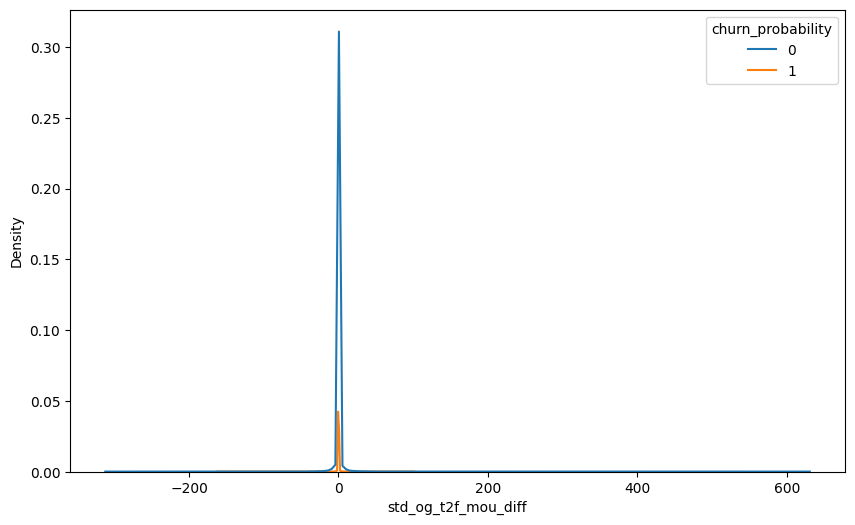

In [61]:
sns.kdeplot(x=df3_['std_og_t2f_mou_diff'], hue=df3_['churn_probability'])

<Axes: xlabel='std_ic_t2f_mou_diff', ylabel='Density'>

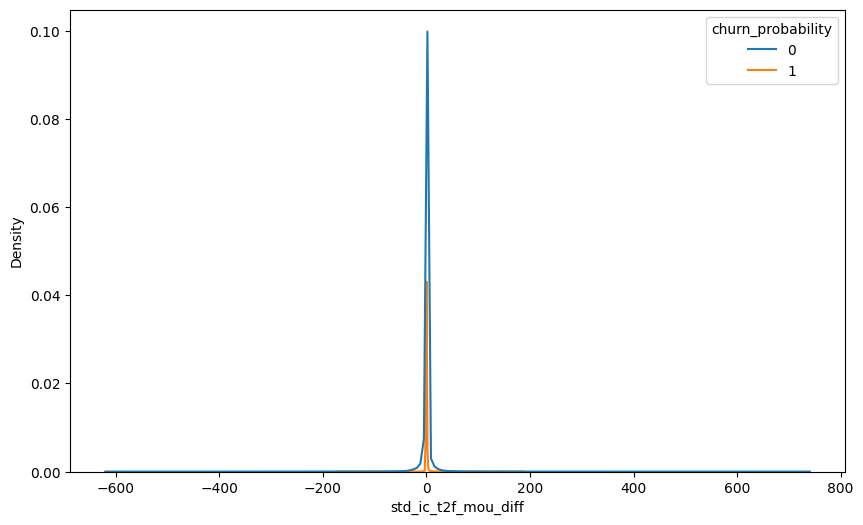

In [62]:
sns.kdeplot(x=df3_['std_ic_t2f_mou_diff'], hue=df3_['churn_probability'])

<Axes: xlabel='spl_ic_mou_diff', ylabel='Density'>

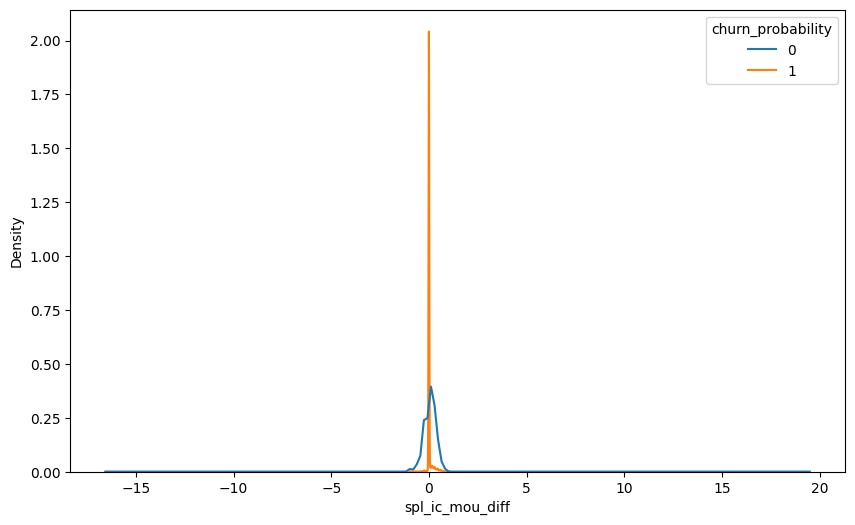

In [63]:
sns.kdeplot(x=df3_['spl_ic_mou_diff'], hue=df3_['churn_probability'])

<Axes: xlabel='ic_others_diff', ylabel='Density'>

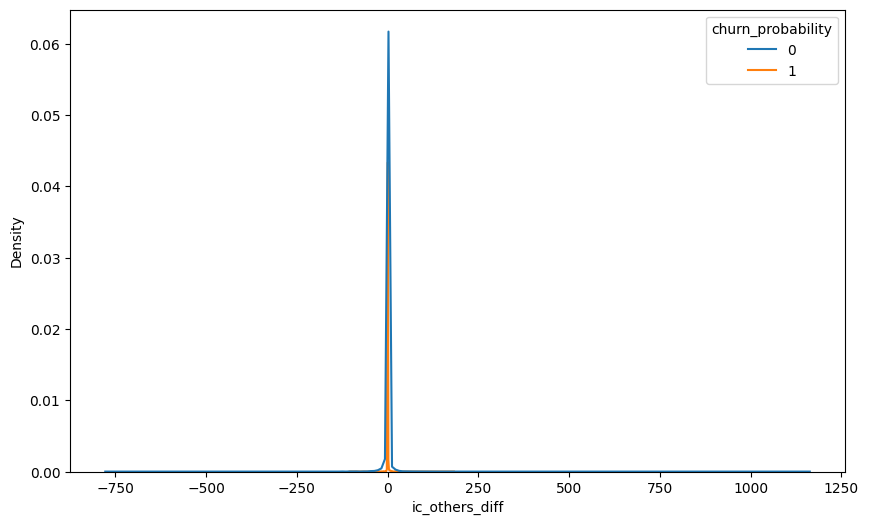

In [64]:
sns.kdeplot(x=df3_['ic_others_diff'], hue=df3_['churn_probability'])

From the above metrics we can see that std_og_t2f_mou_diff, std_ic_t2f_mou_diff, spl_ic_mou_diff, ic_others_diffw has less relationship with the target variable. So we can drop those columns to build the better model.

In [257]:
col_to_drop = ['std_og_t2f_mou_diff', 'std_ic_t2f_mou_diff', 'spl_ic_mou_diff', 'ic_others_diff']

In [66]:
df4 = df3.drop(col_to_drop, axis=1)

In [259]:
import json
columns_to_drop = col_to_drop
json_string = json.dumps(columns_to_drop)

# Open a file in write mode
with open("artifacts/columnsToDrop_stats.json", "w") as f:
    # Write the JSON string to the file
    f.write(json_string)

In [68]:
len(df4.columns)

39

In [69]:
# for col in df4.columns:
#     if col != 'churn_probability':
#         sns.scatterplot(x=df4[col], y=df4['churn_probability'], hue=df4['churn_probability'])
#         plt.show()

**corrlation after feature engineering**

In [70]:
corr_matrix = df4.corr()[(df4.corr() > 0.7) | (df4.corr() < -0.7)]

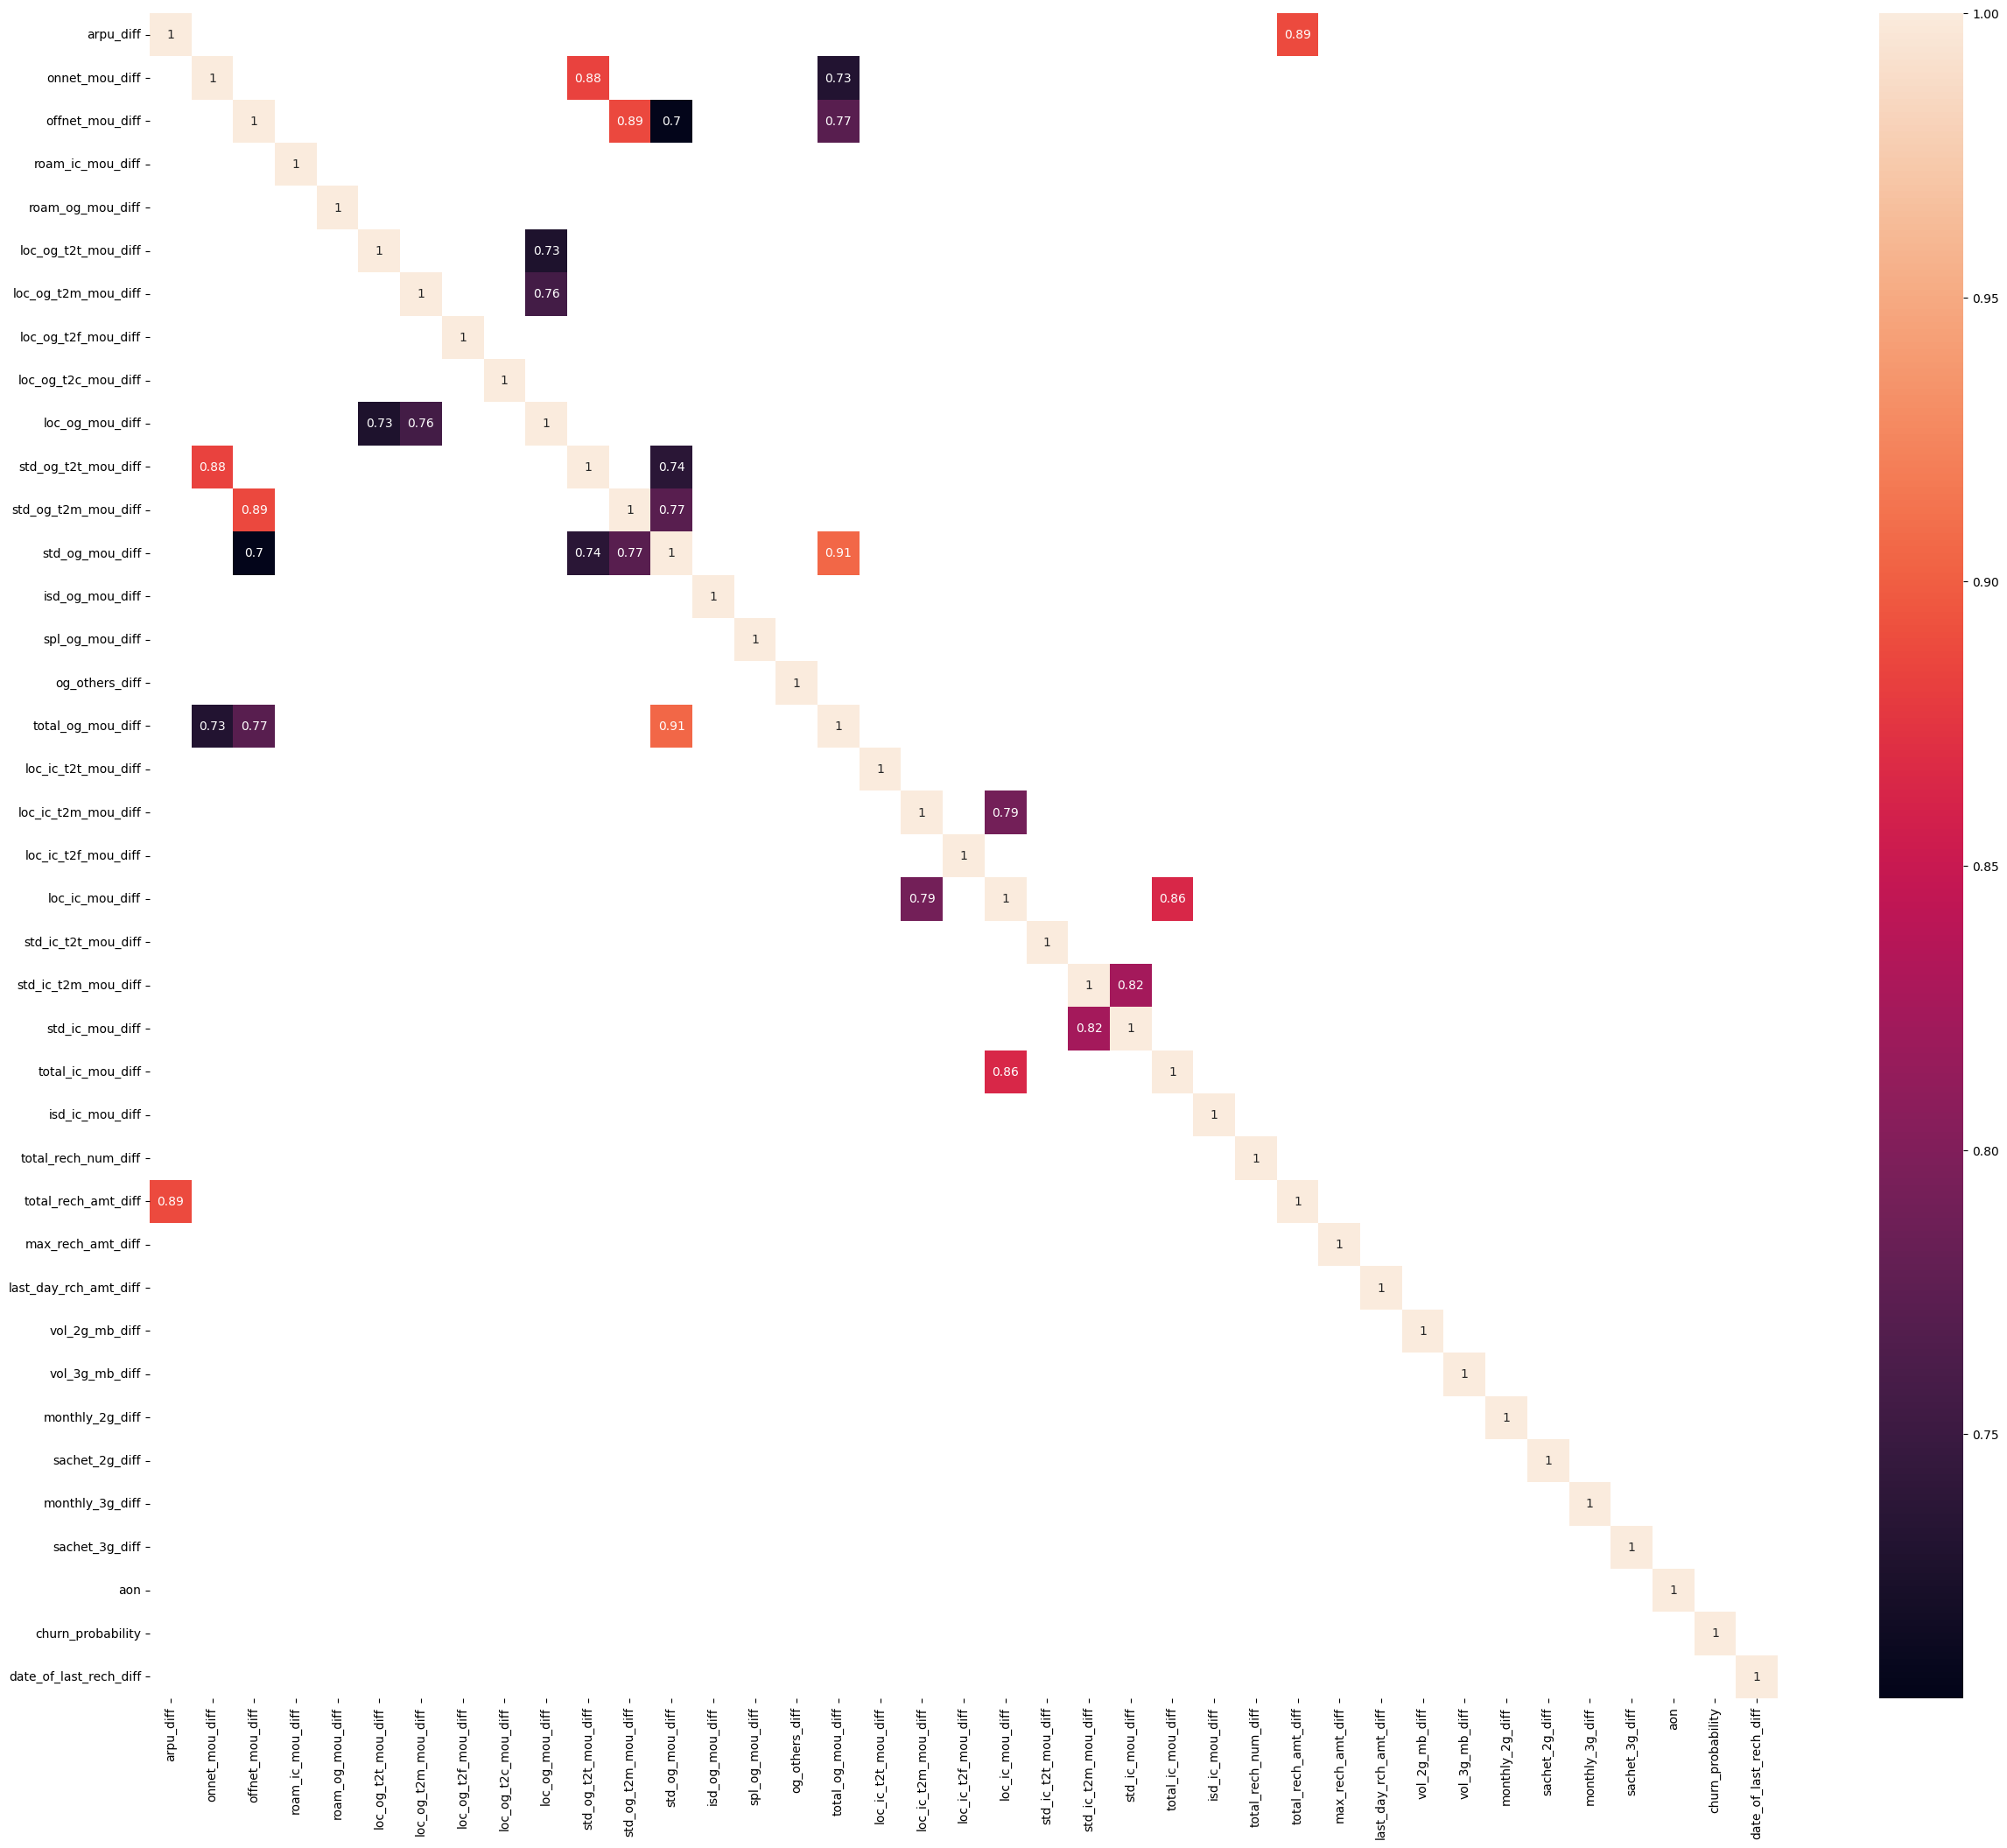

In [71]:
plt.figure(figsize=(30,25), dpi=100)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [72]:
df4.churn_probability.unique()

array([0, 1], dtype=int64)

<Axes: ylabel='arpu_diff'>

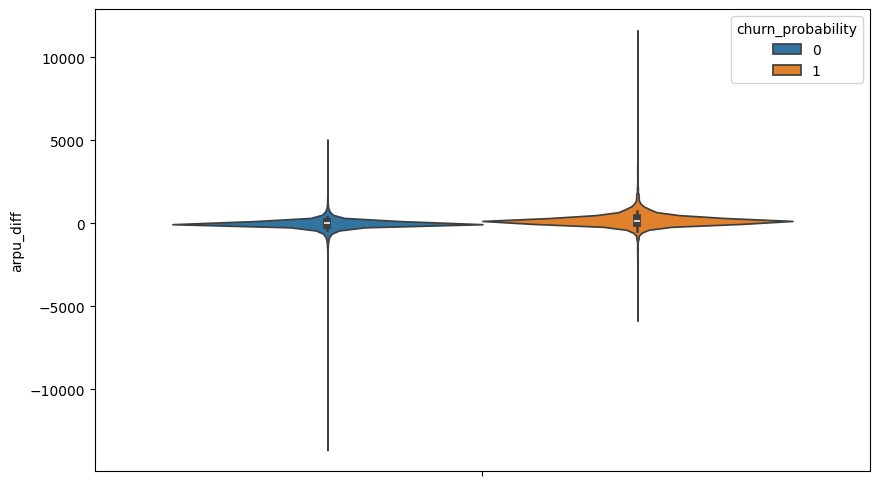

In [391]:
sns.violinplot(y=df3['arpu_diff'], hue=df3['churn_probability'])

<Axes: ylabel='onnet_mou_diff'>

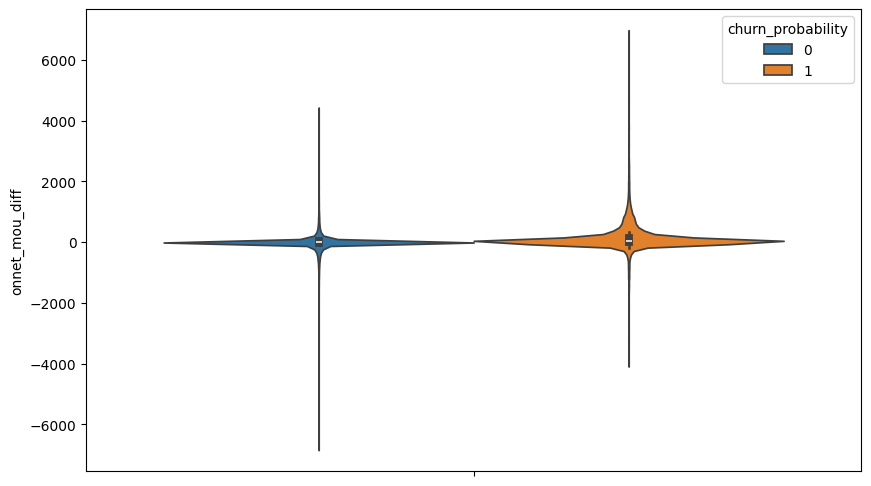

In [392]:
sns.violinplot(y=df3['onnet_mou_diff'], hue=df3['churn_probability'])

<Axes: ylabel='total_ic_mou_diff'>

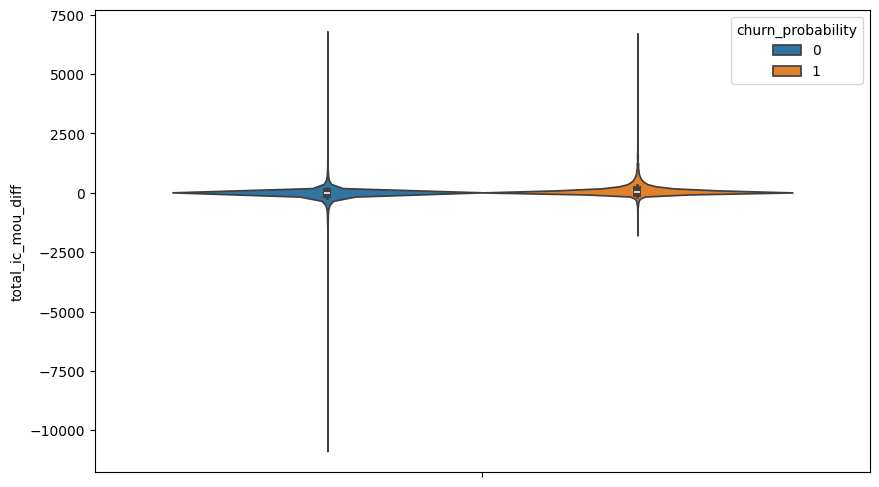

In [157]:
sns.violinplot(y=df3['total_ic_mou_diff'], hue=df3['churn_probability'])

<Axes: ylabel='total_rech_amt_diff'>

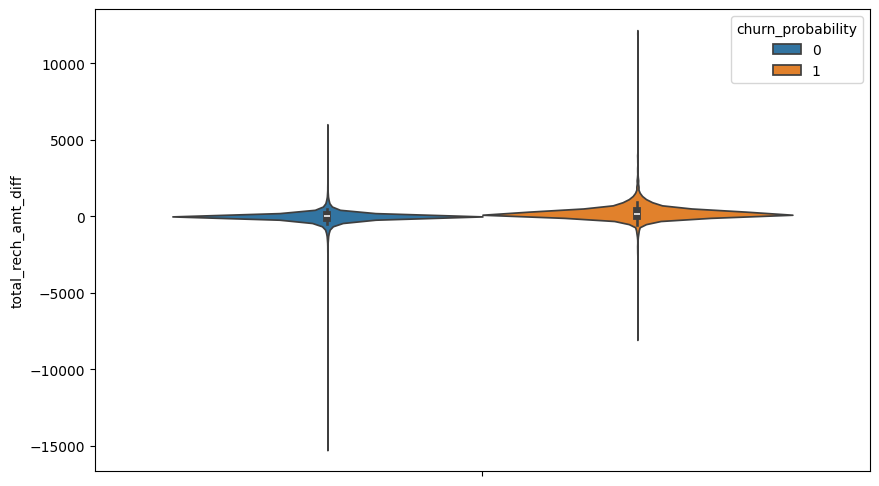

In [158]:
sns.violinplot(y=df3['total_rech_amt_diff'], hue=df3['churn_probability'])

<Axes: ylabel='roam_ic_mou_diff'>

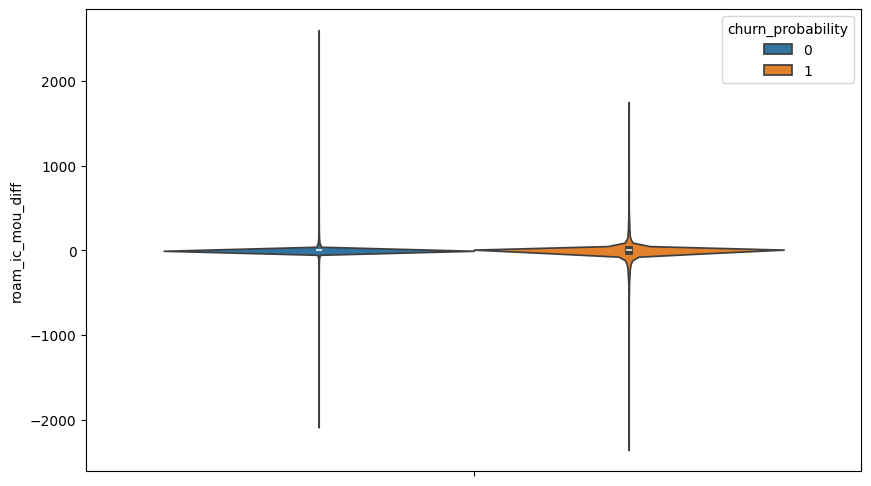

In [159]:
sns.violinplot(y=df3['roam_ic_mou_diff'], hue=df3['churn_probability'])

<Axes: ylabel='roam_og_mou_diff'>

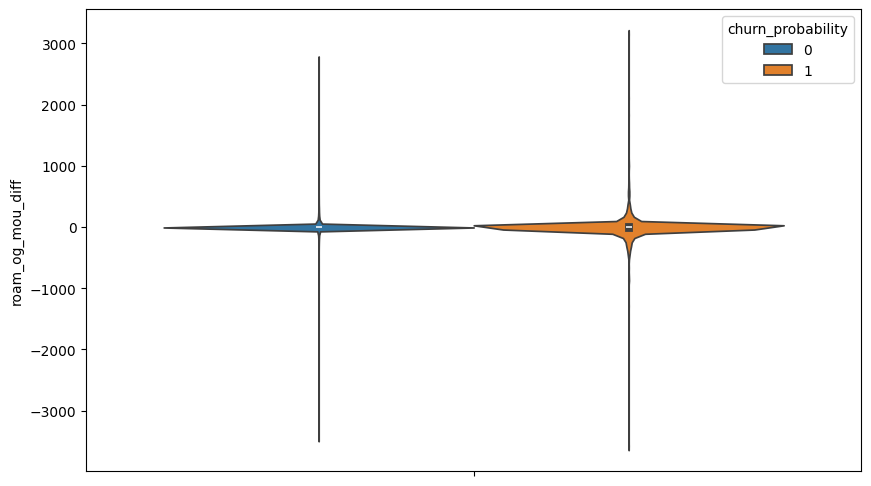

In [160]:
sns.violinplot(y=df3['roam_og_mou_diff'], hue=df3['churn_probability'])

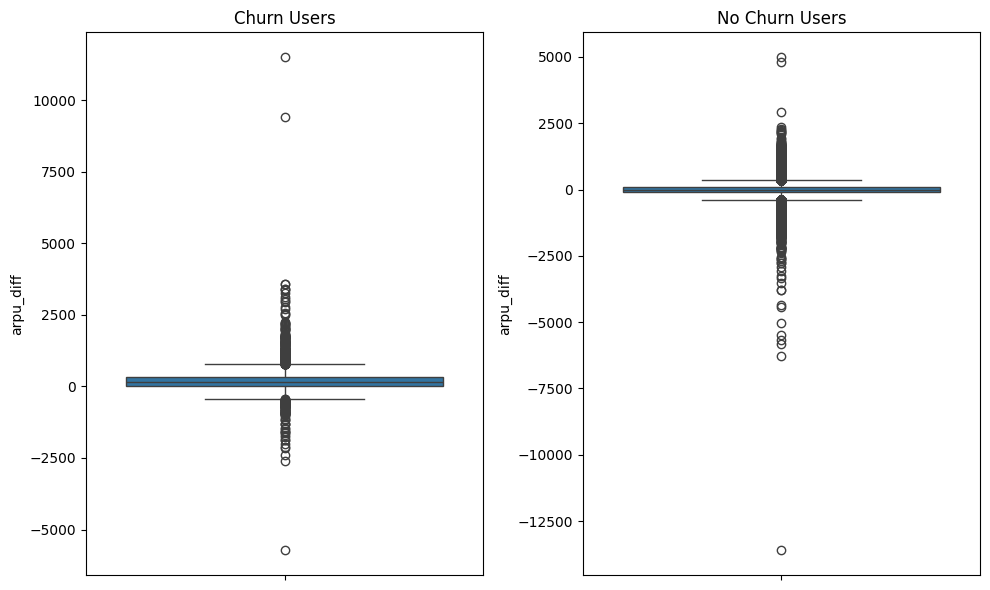

In [393]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='arpu_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='arpu_diff', ax=ax[1])
plt.tight_layout()
plt.show()

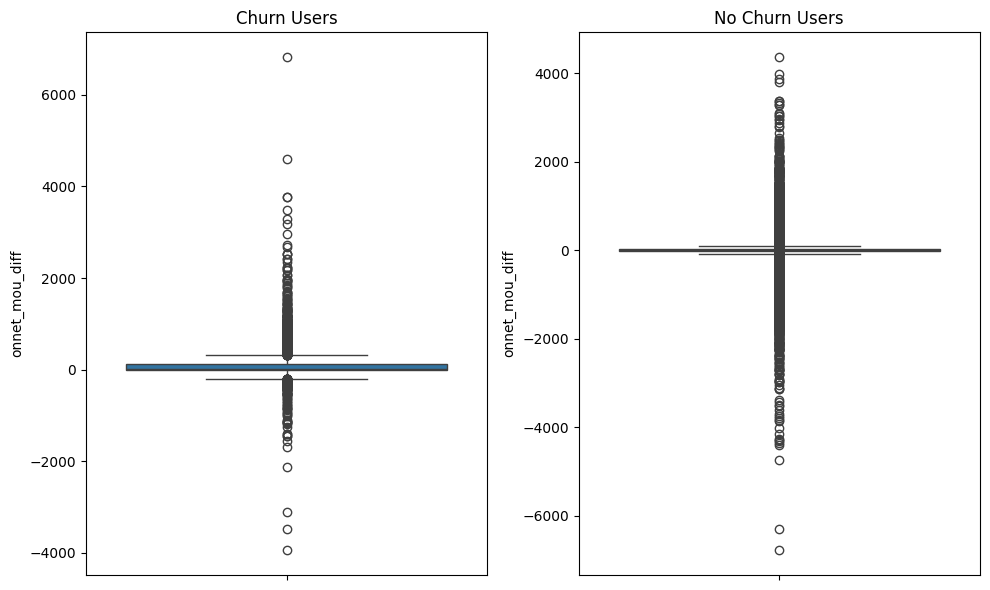

In [162]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='onnet_mou_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='onnet_mou_diff', ax=ax[1])
plt.tight_layout()
plt.show()

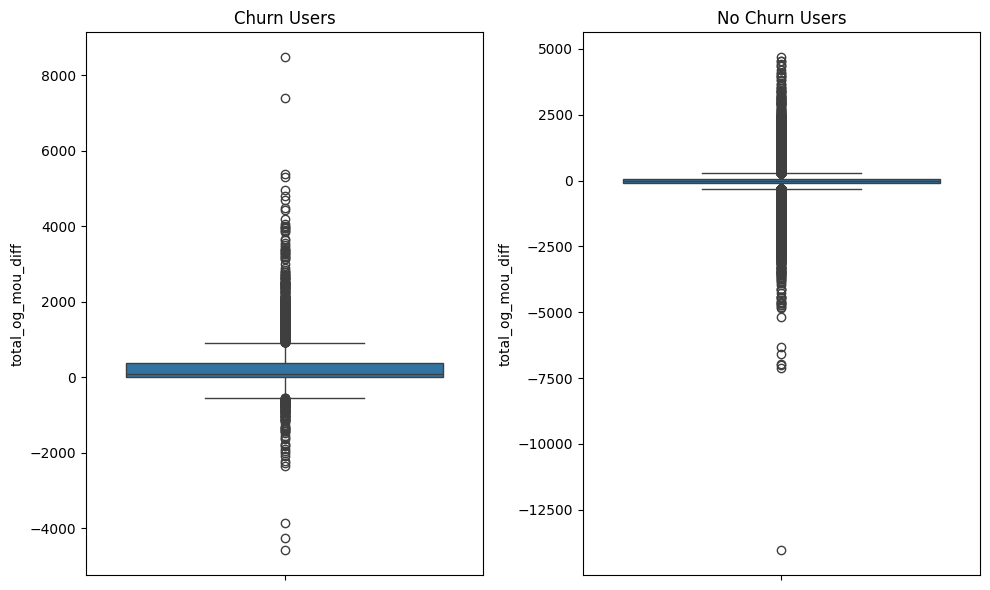

In [163]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='total_og_mou_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='total_og_mou_diff', ax=ax[1])
plt.tight_layout()
plt.show()

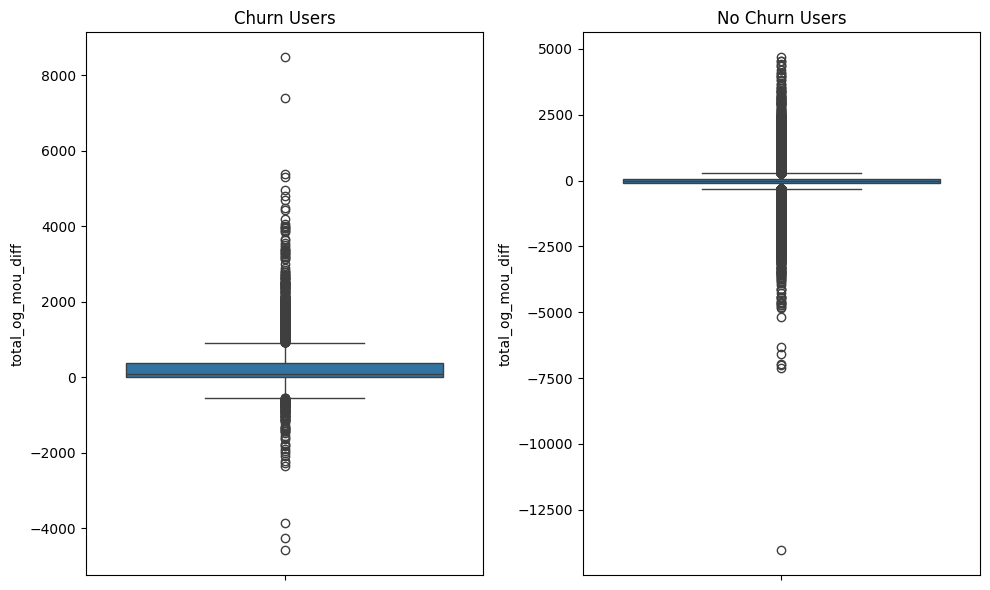

In [164]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='total_og_mou_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='total_og_mou_diff', ax=ax[1])
plt.tight_layout()
plt.show()

From the above plots we can infer that the churn users data is more disperse when compared to no_chuen users.

In [73]:
churn_negative_percent = []
for col in churn_user.columns:
    if col not in  ['churn_probability', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']:
        val = (np.sum(churn_user[col] < 0) / churn_user.shape[0]) * 100
        churn_negative_percent.append(val)

In [74]:
no_churn_negative_percent = []
col_list = []
for col in no_churn_user.columns:
    if col not in ['churn_probability', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']:
        col_list.append(col)
        val = (np.sum(no_churn_user[col] < 0) / no_churn_user.shape[0]) * 100
        no_churn_negative_percent.append(val)

In [75]:
neagtive_perc = {'churn':churn_negative_percent, 'no_churn':no_churn_negative_percent}

In [76]:
negative_percent =  pd.DataFrame(neagtive_perc, index=col_list)

In [77]:
negative_percent.head(10)

churn   no_churn
arpu_diff            21.368480  52.157730
onnet_mou_diff       13.754907  45.990742
offnet_mou_diff      14.413909  47.088298
roam_ic_mou_diff     23.093102   8.999952
roam_og_mou_diff     22.518228   8.817026
loc_og_t2t_mou_diff  10.670219  45.456281
loc_og_t2m_mou_diff  11.595625  48.009289
loc_og_t2f_mou_diff   4.655076  26.777164
loc_og_t2c_mou_diff   7.192933  17.719948
loc_og_mou_diff      11.441391  48.009289

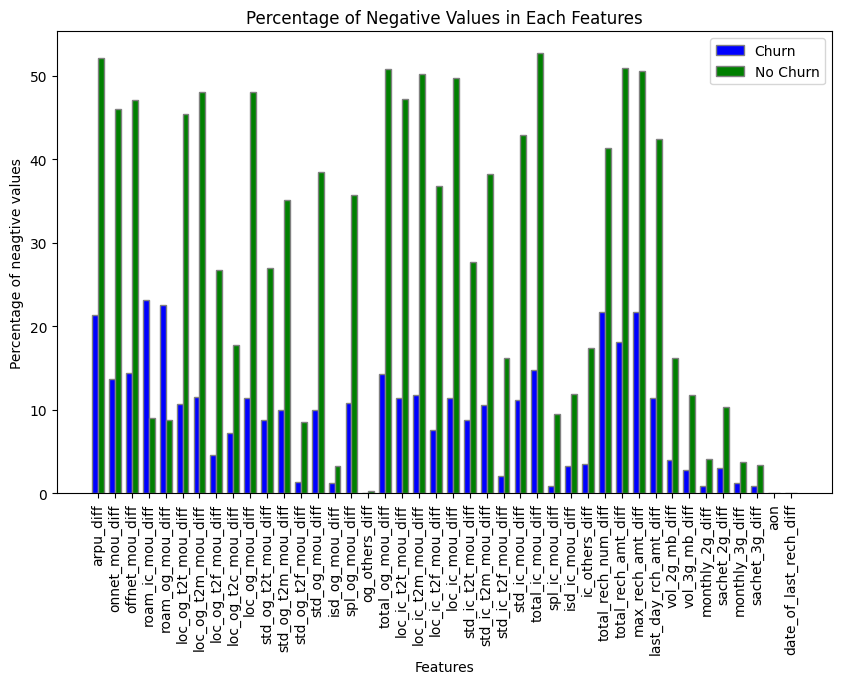

In [78]:
bar_width = 0.35
plt.figure(figsize=(10,6), dpi=100)
r1 = np.arange(len(negative_percent.index))
r2 = [x + bar_width for x in r1]

plt.bar(r1, negative_percent['churn'], color='b', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_percent['no_churn'], color='g', width=bar_width, edgecolor='grey', label='No Churn')

plt.xlabel('Features')
plt.xticks([r + bar_width/2 for r in range(len(negative_percent.index))], negative_percent.index)
plt.ylabel('Percentage of neagtive values')
plt.title('Percentage of Negative Values in Each Features')
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.show()

**As discussed above we can see that the non churn users has more number of neagtive value than churn users, So the feature enginnering what we done is correct.**

In [79]:
df4.head()

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
0     23.750           47.29            29.91              0.00   
1    -42.953            0.00           -30.89              0.00   
2     60.806            0.53            53.99              0.00   
3     45.267            7.26            18.53              0.00   
4    139.143           15.15            47.36             53.64   

   roam_og_mou_diff  loc_og_t2t_mou_diff  loc_og_t2m_mou_diff  \
0              0.00                 1.95                 2.96   
1              0.00                 0.00                 0.00   
2              0.00                 0.53                24.11   
3             -1.63                 6.99                14.28   
4             15.73                 4.03                32.13   

   loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  loc_og_mou_diff  \
0                 0.00                 0.00             4.92   
1                 0.00               -29.79             0.00   
2                 0.00                 2.14            24.64   
3                 0.00                -8.03            21.28   
4                 6.98                 0.00            43.15   

   std_og_t2t_mou_diff  std_og_t2m_mou_diff  std_og_mou_diff  isd_og_mou_diff  \
0                45.33                18.75            64.08              0.0   
1                 0.00                 0.00             0.00              0.0   
2                 0.00                28.94            28.94              0.0   
3                 0.26                10.73            11.56              0.0   
4                 0.00                 4.35             4.35              0.0   

   spl_og_mou_diff  og_others_diff  total_og_mou_diff  loc_ic_t2t_mou_diff  \
0             8.20            0.38              77.58                -5.36   
1           -31.66            0.00             -31.66                -8.85   
2             2.89            0.00              56.49                -1.98   
3           -10.66            0.00              22.19                 1.10   
4             0.00            0.00              47.50                 2.78   

   loc_ic_t2m_mou_diff  loc_ic_t2f_mou_diff  loc_ic_mou_diff  \
0               -16.08                 0.00           -21.45   
1                -9.68                -3.05           -21.59   
2                66.35                 0.00            64.37   
3                -3.15                 7.23             5.18   
4                -8.91                -0.63            -6.77   

   std_ic_t2t_mou_diff  std_ic_t2m_mou_diff  std_ic_mou_diff  \
0                -0.21                -7.50            -7.72   
1                 0.00                 0.00             0.00   
2                11.69                11.83            23.53   
3                 0.00                 6.08             6.08   
4                 0.00                 0.00             0.00   

   total_ic_mou_diff  isd_ic_mou_diff  total_rech_num_diff  \
0             -28.72              0.0                    1   
1             -21.60              0.0                   -2   
2              87.65              0.0                    0   
3              11.27              0.0                   -1   
4              -6.77              0.0                    5   

   total_rech_amt_diff  max_rech_amt_diff  last_day_rch_amt_diff  \
0                   67                 55                     65   
1                  -50                -50                      0   
2                   70                 70                     70   
3                   30                 60                     60   
4                  168                 20                     -5   

   vol_2g_mb_diff  vol_3g_mb_diff  monthly_2g_diff  sachet_2g_diff  \
0            0.00             0.0                0               0   
1            0.00             0.0                0               0   
2            0.00             0.0                0               0   
3            0.00             0.0   

In [80]:
df4.isna().sum()

arpu_diff                    0
onnet_mou_diff            6157
offnet_mou_diff           6157
roam_ic_mou_diff          6157
roam_og_mou_diff          6157
loc_og_t2t_mou_diff       6157
loc_og_t2m_mou_diff       6157
loc_og_t2f_mou_diff       6157
loc_og_t2c_mou_diff       6157
loc_og_mou_diff           6157
std_og_t2t_mou_diff       6157
std_og_t2m_mou_diff       6157
std_og_mou_diff           6157
isd_og_mou_diff           6157
spl_og_mou_diff           6157
og_others_diff            6157
total_og_mou_diff            0
loc_ic_t2t_mou_diff       6157
loc_ic_t2m_mou_diff       6157
loc_ic_t2f_mou_diff       6157
loc_ic_mou_diff           6157
std_ic_t2t_mou_diff       6157
std_ic_t2m_mou_diff       6157
std_ic_mou_diff           6157
total_ic_mou_diff            0
isd_ic_mou_diff           6157
total_rech_num_diff          0
total_rech_amt_diff          0
max_rech_amt_diff            0
last_day_rch_amt_diff        0
vol_2g_mb_diff               0
vol_3g_mb_diff               0
monthly_

## Model Building Before Oversampling

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_b_os =  df4.drop('churn_probability', axis=1) 
y_b_os = df4['churn_probability']

In [86]:
y_b_os.value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [87]:
xtrain_bos, xtest_bos, ytrain_bos, ytest_bos = train_test_split(x_b_os, y_b_os, train_size=0.7, random_state=100, stratify=y_b_os)

## Filling Null values

In [88]:
# train data
for col in xtrain_bos.columns:
    xtrain_bos[col].fillna(xtrain_bos[col].median(), inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1358204685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtrain_bos[col].fillna(xtrain_bos[col].median(), inplace=True)
C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\1358204685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [89]:
xtrain_bos.isna().sum()

arpu_diff                 0
onnet_mou_diff            0
offnet_mou_diff           0
roam_ic_mou_diff          0
roam_og_mou_diff          0
loc_og_t2t_mou_diff       0
loc_og_t2m_mou_diff       0
loc_og_t2f_mou_diff       0
loc_og_t2c_mou_diff       0
loc_og_mou_diff           0
std_og_t2t_mou_diff       0
std_og_t2m_mou_diff       0
std_og_mou_diff           0
isd_og_mou_diff           0
spl_og_mou_diff           0
og_others_diff            0
total_og_mou_diff         0
loc_ic_t2t_mou_diff       0
loc_ic_t2m_mou_diff       0
loc_ic_t2f_mou_diff       0
loc_ic_mou_diff           0
std_ic_t2t_mou_diff       0
std_ic_t2m_mou_diff       0
std_ic_mou_diff           0
total_ic_mou_diff         0
isd_ic_mou_diff           0
total_rech_num_diff       0
total_rech_amt_diff       0
max_rech_amt_diff         0
last_day_rch_amt_diff     0
vol_2g_mb_diff            0
vol_3g_mb_diff            0
monthly_2g_diff           0
sachet_2g_diff            0
monthly_3g_diff           0
sachet_3g_diff      

In [90]:
# test data
for col in xtest_bos.columns:
    xtest_bos[col].fillna(xtest_bos[col].median(), inplace=True)

C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\3572529282.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtest_bos[col].fillna(xtest_bos[col].median(), inplace=True)
C:\Users\Giridaran\AppData\Local\Temp\ipykernel_24564\3572529282.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [91]:
xtest_bos.isna().sum()

arpu_diff                 0
onnet_mou_diff            0
offnet_mou_diff           0
roam_ic_mou_diff          0
roam_og_mou_diff          0
loc_og_t2t_mou_diff       0
loc_og_t2m_mou_diff       0
loc_og_t2f_mou_diff       0
loc_og_t2c_mou_diff       0
loc_og_mou_diff           0
std_og_t2t_mou_diff       0
std_og_t2m_mou_diff       0
std_og_mou_diff           0
isd_og_mou_diff           0
spl_og_mou_diff           0
og_others_diff            0
total_og_mou_diff         0
loc_ic_t2t_mou_diff       0
loc_ic_t2m_mou_diff       0
loc_ic_t2f_mou_diff       0
loc_ic_mou_diff           0
std_ic_t2t_mou_diff       0
std_ic_t2m_mou_diff       0
std_ic_mou_diff           0
total_ic_mou_diff         0
isd_ic_mou_diff           0
total_rech_num_diff       0
total_rech_amt_diff       0
max_rech_amt_diff         0
last_day_rch_amt_diff     0
vol_2g_mb_diff            0
vol_3g_mb_diff            0
monthly_2g_diff           0
sachet_2g_diff            0
monthly_3g_diff           0
sachet_3g_diff      

## Scaling 

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()

In [94]:
sc.fit(xtrain_bos)

StandardScaler()

In [95]:
# train data
xtrain_bos = pd.DataFrame(sc.transform(xtrain_bos), columns=xtrain_bos.columns)

In [96]:
# test data
xtest_bos = pd.DataFrame(sc.transform(xtest_bos), columns=xtest_bos.columns)

In [99]:
from sklearn.tree import DecisionTreeClassifier


**1. DecisionTreeClassifier**

In [125]:
model_1_bos = DecisionTreeClassifier(class_weight="balanced", random_state=10)
model_1_bos.fit(xtrain_bos, ytrain_bos)

DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [126]:
append_to_metric_df("DecisionTreeClassifier_BOS",model_1_bos,xtrain_bos, xtest_bos, ytrain_bos, ytest_bos)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18860
           1       0.51      0.51      0.51      2140

    accuracy                           0.90     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.90      0.90      0.90     21000



**2. RandomForest**

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
model_2_bos = RandomForestClassifier(class_weight="balanced", random_state=10)
model_2_bos.fit(xtrain_bos, ytrain_bos)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [129]:
append_to_metric_df("RandomForestClassifier_BOS",model_2_bos,xtrain_bos, xtest_bos, ytrain_bos, ytest_bos)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18860
           1       0.79      0.51      0.62      2140

    accuracy                           0.94     21000
   macro avg       0.87      0.75      0.79     21000
weighted avg       0.93      0.94      0.93     21000



# Final Model Bulding With SMOTE

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [233]:
x =  df4.drop('churn_probability', axis=1) 
y = df4['churn_probability']

In [234]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7, random_state=100, stratify=y)

In [235]:
xtrain.shape

(48999, 38)

In [236]:
xtest.shape

(21000, 38)

## Filling Missing values 

In [237]:
from sklearn.impute import SimpleImputer
import numpy as np

In [238]:
xtrain.isna().sum()

arpu_diff                    0
onnet_mou_diff            4312
offnet_mou_diff           4312
roam_ic_mou_diff          4312
roam_og_mou_diff          4312
loc_og_t2t_mou_diff       4312
loc_og_t2m_mou_diff       4312
loc_og_t2f_mou_diff       4312
loc_og_t2c_mou_diff       4312
loc_og_mou_diff           4312
std_og_t2t_mou_diff       4312
std_og_t2m_mou_diff       4312
std_og_mou_diff           4312
isd_og_mou_diff           4312
spl_og_mou_diff           4312
og_others_diff            4312
total_og_mou_diff            0
loc_ic_t2t_mou_diff       4312
loc_ic_t2m_mou_diff       4312
loc_ic_t2f_mou_diff       4312
loc_ic_mou_diff           4312
std_ic_t2t_mou_diff       4312
std_ic_t2m_mou_diff       4312
std_ic_mou_diff           4312
total_ic_mou_diff            0
isd_ic_mou_diff           4312
total_rech_num_diff          0
total_rech_amt_diff          0
max_rech_amt_diff            0
last_day_rch_amt_diff        0
vol_2g_mb_diff               0
vol_3g_mb_diff               0
monthly_

In [239]:
imputer = SimpleImputer(strategy='median')

In [240]:
xtrain_new = imputer.fit_transform(xtrain)

In [241]:
xtrain_n = pd.DataFrame(xtrain_new, columns=xtrain.columns)

In [242]:
xtrain_n.isna().sum()

arpu_diff                 0
onnet_mou_diff            0
offnet_mou_diff           0
roam_ic_mou_diff          0
roam_og_mou_diff          0
loc_og_t2t_mou_diff       0
loc_og_t2m_mou_diff       0
loc_og_t2f_mou_diff       0
loc_og_t2c_mou_diff       0
loc_og_mou_diff           0
std_og_t2t_mou_diff       0
std_og_t2m_mou_diff       0
std_og_mou_diff           0
isd_og_mou_diff           0
spl_og_mou_diff           0
og_others_diff            0
total_og_mou_diff         0
loc_ic_t2t_mou_diff       0
loc_ic_t2m_mou_diff       0
loc_ic_t2f_mou_diff       0
loc_ic_mou_diff           0
std_ic_t2t_mou_diff       0
std_ic_t2m_mou_diff       0
std_ic_mou_diff           0
total_ic_mou_diff         0
isd_ic_mou_diff           0
total_rech_num_diff       0
total_rech_amt_diff       0
max_rech_amt_diff         0
last_day_rch_amt_diff     0
vol_2g_mb_diff            0
vol_3g_mb_diff            0
monthly_2g_diff           0
sachet_2g_diff            0
monthly_3g_diff           0
sachet_3g_diff      

In [243]:
xtest_new = imputer.transform(xtest)

In [244]:
xtest_n = pd.DataFrame(xtest_new, columns=xtest.columns)

In [245]:
xtest_n.isna().sum()

arpu_diff                 0
onnet_mou_diff            0
offnet_mou_diff           0
roam_ic_mou_diff          0
roam_og_mou_diff          0
loc_og_t2t_mou_diff       0
loc_og_t2m_mou_diff       0
loc_og_t2f_mou_diff       0
loc_og_t2c_mou_diff       0
loc_og_mou_diff           0
std_og_t2t_mou_diff       0
std_og_t2m_mou_diff       0
std_og_mou_diff           0
isd_og_mou_diff           0
spl_og_mou_diff           0
og_others_diff            0
total_og_mou_diff         0
loc_ic_t2t_mou_diff       0
loc_ic_t2m_mou_diff       0
loc_ic_t2f_mou_diff       0
loc_ic_mou_diff           0
std_ic_t2t_mou_diff       0
std_ic_t2m_mou_diff       0
std_ic_mou_diff           0
total_ic_mou_diff         0
isd_ic_mou_diff           0
total_rech_num_diff       0
total_rech_amt_diff       0
max_rech_amt_diff         0
last_day_rch_amt_diff     0
vol_2g_mb_diff            0
vol_3g_mb_diff            0
monthly_2g_diff           0
sachet_2g_diff            0
monthly_3g_diff           0
sachet_3g_diff      

In [254]:
import pickle

with open('artifacts/fill_missing_values.pkl', 'wb') as f:
    pickle.dump(imputer, f)

## SMOTE (Synthetic Minority Oversampling Technique)

In [246]:
# pip install imblearn

In [247]:
from imblearn.over_sampling import SMOTE

In [248]:
ytrain.value_counts()

churn_probability
0    44007
1     4992
Name: count, dtype: int64

In [249]:
sm = SMOTE(sampling_strategy=0.5, random_state=10)

In [250]:
xtrain, ytrain  = sm.fit_resample(xtrain_n, ytrain)

In [251]:
xtest = xtest_n

In [252]:
ytrain.value_counts()

churn_probability
0    44007
1    22003
Name: count, dtype: int64

## Scaling

In [143]:
sc = StandardScaler()

In [144]:
sc.fit(xtrain)

StandardScaler()

In [145]:
xtrain = pd.DataFrame(sc.transform(xtrain), columns=xtrain.columns)

In [146]:
xtest = pd.DataFrame(sc.transform(xtest), columns=xtest.columns)

In [255]:
with open('artifacts/scaling_data.pkl', 'wb') as f:
    pickle.dump(sc, f)

## Transforming

In [147]:
from sklearn.preprocessing import PowerTransformer

In [148]:
tr = PowerTransformer()

In [149]:
tr.fit(xtrain)

PowerTransformer()

In [256]:
with open('artifacts/transforming_data.pkl', 'wb') as f:
    pickle.dump(tr, f)

In [150]:
xtrain = pd.DataFrame(tr.transform(xtrain), columns=xtrain.columns)

In [151]:
xtest = pd.DataFrame(tr.transform(xtest), columns=xtest.columns)

In [152]:
ytrain.value_counts()

churn_probability
0    44007
1    22003
Name: count, dtype: int64

In [153]:
ytest.value_counts()

churn_probability
0    18860
1     2140
Name: count, dtype: int64

## Logistic Regression

In [154]:
model_1 =  LogisticRegression(max_iter=1000)
model_1.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [155]:
append_to_metric_df("LogisticRegression", model_1, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     44007
           1       0.79      0.45      0.57     22003

    accuracy                           0.78     66010
   macro avg       0.78      0.69      0.71     66010
weighted avg       0.78      0.78      0.76     66010

test data report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18860
           1       0.46      0.44      0.45      2140

    accuracy                           0.89     21000
   macro avg       0.70      0.69      0.69     21000
weighted avg       0.89      0.89      0.89     21000



## Decision Tree

In [156]:
model_2 = DecisionTreeClassifier(class_weight="balanced", random_state=10)
model_2.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [157]:
append_to_metric_df("DecisionTreeClassifier", model_2, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00     22003

    accuracy                           1.00     66010
   macro avg       1.00      1.00      1.00     66010
weighted avg       1.00      1.00      1.00     66010

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     18860
           1       0.42      0.60      0.49      2140

    accuracy                           0.87     21000
   macro avg       0.68      0.75      0.71     21000
weighted avg       0.90      0.87      0.88     21000



## Random Forest

In [158]:
model_3 = RandomForestClassifier(class_weight="balanced", random_state=10)
model_3.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [159]:
append_to_metric_df("RandomForestClassifier", model_3, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00     22003

    accuracy                           1.00     66010
   macro avg       1.00      1.00      1.00     66010
weighted avg       1.00      1.00      1.00     66010

test data report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     18860
           1       0.68      0.65      0.66      2140

    accuracy                           0.93     21000
   macro avg       0.82      0.81      0.81     21000
weighted avg       0.93      0.93      0.93     21000



## AdaBoosting

In [160]:
model_4 = AdaBoostClassifier(random_state=10)

In [161]:
model_4.fit(xtrain, ytrain)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=10)

In [162]:
append_to_metric_df("AdaBoostClassifier", model_4, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     44007
           1       0.84      0.78      0.81     22003

    accuracy                           0.88     66010
   macro avg       0.87      0.85      0.86     66010
weighted avg       0.88      0.88      0.88     66010

test data report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     18860
           1       0.54      0.66      0.59      2140

    accuracy                           0.91     21000
   macro avg       0.75      0.80      0.77     21000
weighted avg       0.92      0.91      0.91     21000



## Gradient Boosting

In [163]:
model_5 = GradientBoostingClassifier(random_state=10)
model_5.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=10)

In [164]:
append_to_metric_df("GradientBoostingClassifier", model_5, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     44007
           1       0.88      0.81      0.84     22003

    accuracy                           0.90     66010
   macro avg       0.89      0.88      0.88     66010
weighted avg       0.90      0.90      0.90     66010

test data report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18860
           1       0.60      0.70      0.65      2140

    accuracy                           0.92     21000
   macro avg       0.78      0.82      0.80     21000
weighted avg       0.93      0.92      0.93     21000



## XGBoosting

In [165]:
# pip install xgboost

In [166]:
from xgboost import XGBClassifier

In [167]:
model_6 = XGBClassifier(random_state=10)
model_6.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [168]:
append_to_metric_df("XGBClassifier", model_6, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     44007
           1       0.95      0.94      0.95     22003

    accuracy                           0.96     66010
   macro avg       0.96      0.96      0.96     66010
weighted avg       0.96      0.96      0.96     66010

test data report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     18860
           1       0.66      0.65      0.65      2140

    accuracy                           0.93     21000
   macro avg       0.81      0.80      0.81     21000
weighted avg       0.93      0.93      0.93     21000



## KNN

In [169]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [170]:
model_7 = KNeighborsClassifier()
model_7.fit(xtrain, ytrain)

KNeighborsClassifier()

In [171]:
append_to_metric_df("KNN", model_7, xtrain, xtest, ytrain, ytest)

C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Giridaran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


train data report: 
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     44007
           1       0.79      0.97      0.87     22003

    accuracy                           0.90     66010
   macro avg       0.89      0.92      0.90     66010
weighted avg       0.92      0.90      0.91     66010

test data report: 
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     18860
           1       0.31      0.67      0.42      2140

    accuracy                           0.81     21000
   macro avg       0.63      0.75      0.66     21000
weighted avg       0.89      0.81      0.84     21000



## Naive Bayes

In [172]:
model_8 = BernoulliNB()
model_8.fit(xtrain, ytrain)

BernoulliNB()

In [173]:
append_to_metric_df("BernoulliNB", model_8, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     44007
           1       0.63      0.65      0.64     22003

    accuracy                           0.76     66010
   macro avg       0.73      0.73      0.73     66010
weighted avg       0.76      0.76      0.76     66010

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     18860
           1       0.28      0.64      0.39      2140

    accuracy                           0.79     21000
   macro avg       0.62      0.73      0.63     21000
weighted avg       0.88      0.79      0.83     21000



In [174]:
pd.DataFrame(model_metrics).sort_values(by='Sensitivity_test')

Model  Sensitivity_train  Specificity_train  \
4                      Base_model_KNN           0.490785           0.974814   
7                  LogisticRegression           0.448893           0.941676   
0       Base Model LogisticRegression           0.447917           0.985207   
1       Base Model LogisticRegression           0.447917           0.985207   
6          RandomForestClassifier_BOS           0.999599           0.984199   
5          DecisionTreeClassifier_BOS           1.000000           0.944008   
2   Base_model_DecisionTreeClassifier           1.000000           0.946501   
3   Base_model_RandomForestClassifier           0.999800           0.982927   
8              DecisionTreeClassifier           1.000000           0.904295   
14                        BernoulliNB           0.652775           0.812195   
9              RandomForestClassifier           1.000000           0.966013   
12                      XGBClassifier           0.943826           0.961718   
10                 AdaBoostClassifier           0.778894           0.936373   
13                                KNN           0.968686           0.830912   
11         GradientBoostingClassifier           0.811026           0.947667   

    Accuracy_train  F1-Score_train  Precission_train  ROC_AUC_Score_train  \
4         0.934305        0.603523          0.783499             0.961233   
7         0.776943        0.572945          0.791743             0.802286   
0         0.930305        0.567009          0.772366             0.898948   
1         0.930305        0.567009          0.772366             0.898948   
6         0.999959        0.999800          1.000000             1.000000   
5         1.000000        1.000000          1.000000             1.000000   
2         1.000000        1.000000          1.000000             1.000000   
3         0.999980        0.999900          1.000000             1.000000   
8         1.000000        1.000000          1.000000             1.000000   
14        0.758900        0.643489          0.634464             0.795551   
9         1.000000        1.000000          1.000000             1.000000   
12        0.964930        0.947205          0.950609             0.993509   
10        0.877019        0.808511          0.840469             0.932949   
13        0.904651        0.871346          0.791783             0.984981   
11        0.899803        0.843655          0.879021             0.954658   

    Sensitivity_test  Specificity_test  Accuracy_test  F1-Score_test  \
4           0.376636          0.974814       0.913857       0.471207   
7           0.436449          0.941676       0.890190       0.447532   
0           0.451402          0.985207       0.930810       0.570753   
1           0.451402          0.985207       0.930810       0.570753   
6           0.511682          0.984199       0.936048       0.619870   
5           0.512150          0.944008       0.900000       0.510718   
2           0.571028          0.946501       0.908238       0.559140   
3           0.574766          0.982927       0.941333       0.666306   
8           0.598598          0.904295       0.873143       0.490241   
14          0.642056          0.812195       0.794857       0.389456   
9           0.646729          0.966013       0.933476       0.664586   
12          0.646729          0.961718       0.929619       0.651908   
10          0.657477          0.936373       0.907952       0.592795   
13          0.665888          0.830912       0.814095       0.421972   
11          0.701402          0.947667       0.922571       0.648660   

    Precission_test  ROC_AUC_Score_test  
4          0.629196            0.825458  
7          0.459194            0.789886  
0          0.775904            0.901623  
1          0.775904            0.901623  
6          0.786073            0.922043  
5          0.509294            0.728079  
2          0.547736            0.758764  
3          0.792526            0.935102  
8  

- From the above metrica we can see that some models are overfitting, and some model are performes really well, But for our business we need a model which should performes well in finding the churn users, it is ok even it has predicted a non churn customer as churn, but it should not miss any churn customer, Because in Telecom indutory it is very hard to get a new customer rather than retaining the old customer.
- So in this case we should look for a modle which has high sensitivity, Its ok even if we have low specificity and precission.
- In this case **GradientBoostingClassifier** model performes well, Its sensitivity score is high when compared to other models.

**Important Features**

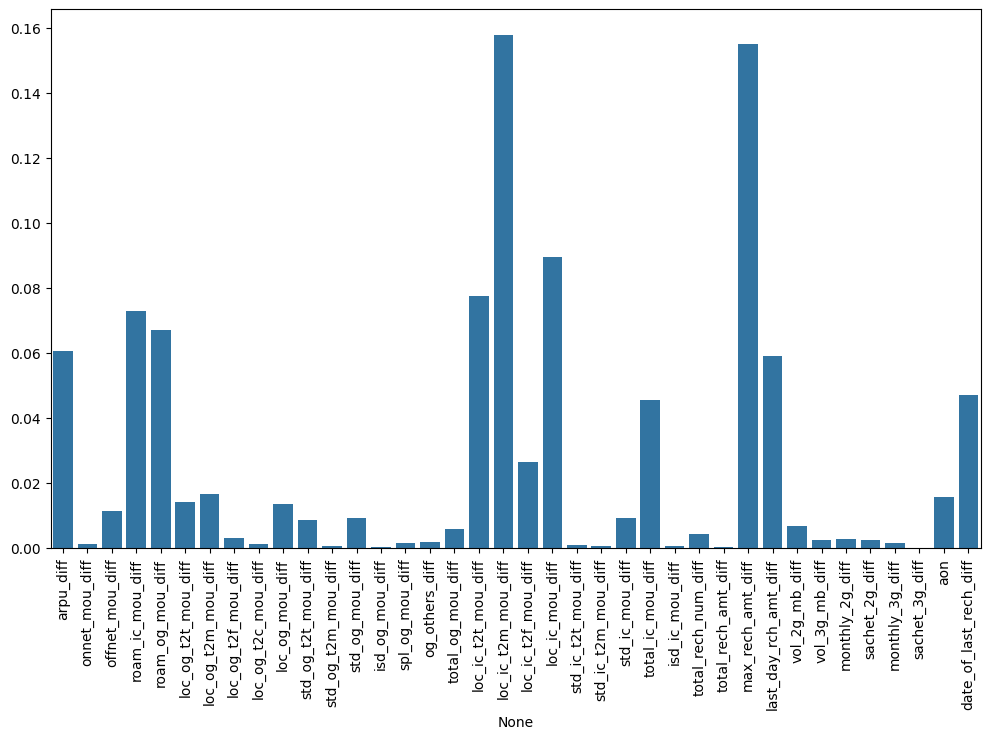

In [175]:
plt.figure(figsize=(12,7), dpi=100)
sns.barplot(x=xtrain.columns,y = model_5.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Using GradientBoosting found important features.
1. loc_ic_t2m_mou_diff
2. loc_ic_mou_diff
3. roam_ic_mou_diff
4. roam_og_mou_diff
5. max_rech_amt_diff
6. loc_ic_t2t_mou_diff

these are thr most important features among all.

## Business Interpretation

From the data we found that the users who churn are reducing their usage of the service every month, Where has the users who didn't churn are using the services consistently or they increasing their usage, So we did some feature engineering on our data, We found the difference between the 3 months values and made it as a single feature, So that the churn users will have hugh difference value and no churn user will have less difference value or negative value. Apart from this we found that the usage of roaming is very high for churn users when compared to no churn users, So we can speculate that some of the users are churning because there use to travel a lot and our service many not performes well in roaming or these users are relocated to different place and in that place our service may not performes well, To verify this we can chenk these customers locations and check for our networks performance in those locations and take necessary action accordingly.

## Business / Model Justification

- The main motive is to improve the performance of the model. As per the Business scenario, We have to predect the users who is going to churn, So that we can take some necessary steps to retain that user.

- As we discussed before in Telicom Industory getting a new customer is harder that retaing the old customer, we should predict the maximum number of churn customer, its ok even if we miss classified some of the not churn customers as churn (which mean we can compromise for the precision score). So we should look for the model which gives high recall score for class 1 (Sensitivity).

- So recall for the class 1 is the metric we should look for among all the models we built, and good precision is also important.

- From the above Model metrics table we can see that **GradientBoostingClassifier** model performed well according to our requirements, Where GradientBoostingClassifier model performes very well in Sensitivity (70%) and precission (60%).

**converting the obtimal model into a pickle file.**

In [176]:
import pickle

with open('artifacts/gradient_boosting.pkl', 'wb') as f:
    pickle.dump(model_5, f)

In [177]:
with open('artifacts/gradient_boosting.pkl', 'rb') as f:
    model = pickle.load(f)

In [178]:
ypred = model.predict(xtest)

In [180]:
ypred[:9]

array([0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [182]:
ypred_series = pd.Series(ypred)
ypred_series.value_counts()

0    18512
1     2488
Name: count, dtype: int64

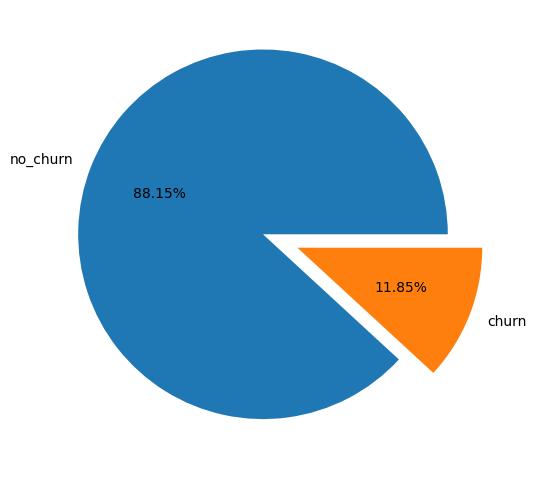

In [198]:
plt.pie(ypred_series.value_counts().values, labels=['no_churn', 'churn'], autopct="%.2f%%", explode=[0.1, 0.1])
plt.show()